<div style="border:solid green 2px; padding: 20px">

<b>Привет, Алексей! Поздравляю с выполнением очередного проекта!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    



# Маркетинговый анализ
***

# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Загрузка и подготовка данных](#1)**
    - [1) Импортируем библиотеки, объявим класс MetricCalculator для анализа](#1_1)
    - [2) Прочитаем данные](#1_2)
    - [3) Выведем первые и последние пять строк каждой из таблиц, общую информацию](#1_3)
    - [Вывод](#1_conclusion)
<br></br>
* **[II. Исследовательский анализ данных](#2)**
    - [1) Получим профили пользовтеля для анализа](#2_1)
    - [2) Установим момент и горизонт анализа данных](#2_2)
    - [3) Исследуем сведения о посещении сайтах](#2_3)
        - [из каких стран пользователи](#2_3_1)
        - [устройства пользователей](#2_3_2)
        - [информация о покупках](#2_3_3)
        - [каналы привлечения пользователей](#2_3_4)
        - [информация о расходах](#2_3_5)
        - [сравним TipTop со всеми остальными платными каналами](#2_3_6)
    - [Выводы по итогам EDA](#2_conclusion)
<br></br> 
* **[III. Маркетинговый анализ](#3)**
    - [1) Проверим окупаемость рекламы](#3_1)
    - [2) Проверим характеристики пользователей](#3_2)
        - [страна первого посещения пользователей](#3_2_1)
        - [источник привлечения пользователей](#3_2_2)
        - [проверим связь пользователей из США и канал привлечения](#3_2_3)
        - [проверим каналы привлечения на окупаемость](#3_2_4)
        - [устройство пользователей](#3_2_5)
        - [устройство пользователей и европейский рынок](#3_2_6)
    - [3) Проверим конверсию](#3_3)
        - [посчитаем общую конверсию](#3_3_1)
        - [посчитаем конверсию по регионам](#3_3_2)
        - [посчитаем конверсию по каналам](#3_3_3)
        - [посчитаем конверсию по устройствам](#3_3_4)
        - [посчитаем длительность пользовательской сесии](#3_3_5)
        - [проверим, различаются ли средняя длительность сессии в зависимости от устройства](#3_3_6)
        - [проверим, различаются ли средняя длительность сессии для платящих и не платящих пользователей](#3_3_7)
        - [проверим, различаются ли средняя длительность сессии в зависимости от статуса пользователя](#3_3_8)
    - [4) Проверим удержание](#3_4)
        - [посчитаем общее удержание](#3_4_1)
        - [посчитаем удержание по регионам](#3_4_2)
        - [посчитаем удержание по каналам](#3_4_3)
        - [посчитаем удержание по устройствам](#3_4_4)
    - [Выводы по итогам маркетингового анализа](#3_conclusion)
<br></br>

# I. Загрузка и подготовка данных<a class='anchor' id='1'>
***

## 1) Импортируем библиотеки, объявим класс MetricCalculator для анализа<a class="anchor" id="1_1"></a>

In [1]:
!pip install squarify

In [2]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import seaborn as sns
import squarify
from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
class MetricCalculator:
    """Создаем профили пользователя, расчитываем и визуализируем метрики."""

    def __init__(self, visits, orders, costs):
        self.visits = pd.read_csv(visits, parse_dates=['Session Start',
                                                       'Session End'])
        self.orders = pd.read_csv(orders, parse_dates=['Event Dt'])
        self.costs = pd.read_csv(costs, parse_dates=['dt'])

    def columns_fixer(self):
        """Приводим колонки к одному регистру, переименовываем по
        необходимости, конвертируем формат."""
        datasets = [self.visits, self.orders, self.costs]

        for dataset in datasets:
            dataset.columns = [name.lower().replace(' ', '_') for name
                               in dataset.columns.values]

        self.costs['dt'] = self.costs['dt'].dt.date

    def grouped_summary(self, profiles, dim, dim_name):
        """Получаем сводную таблицу с % платящих."""
        columns = {dim: dim_name,
                   'user_id_y': 'число клиентов',
                   'user_id_x': 'платящие'}
        unique_cnt = profiles.groupby(dim)['user_id'].nunique()
        dim_by_payer = (profiles.query('payer == True')
                                .groupby(dim)
                                .agg({'user_id': 'count'}).reset_index())
        dim_by_payer['% от платящих'] = (dim_by_payer['user_id'] * 100 /
                                         dim_by_payer['user_id'].sum())
        dim_by_payer = (dim_by_payer.merge(unique_cnt, on=dim)
                                    .rename(columns=columns))
        dim_by_payer['% платящих'] = (dim_by_payer['платящие'] * 100 /
                                      dim_by_payer['число клиентов'])
        sums_row = pd.Series(['---', sum(dim_by_payer['платящие']),
                              sum(dim_by_payer['% от платящих']),
                              sum(dim_by_payer['число клиентов']),
                              '---'],
                              index=dim_by_payer.columns)
        dim_by_payer = dim_by_payer.sort_values(by='платящие')
        dim_by_payer = dim_by_payer.append(sums_row, ignore_index=True)
        return dim_by_payer

    def acquisitions_date(self, profiles, observation,
                          horizon, ignore_horizon):
        """Исключаем пользователей, не «доживших» до горизонта анализа."""
        if ignore_horizon:
            acquisition_date = observation
        acquisition_date = observation - timedelta(days=horizon - 1)
        raw_data = profiles.query('dt <= @acquisition_date')
        return raw_data

    def group_by_dimensions(self, df, dims, horizon,
                            values='user_id', aggfunc='nunique', cumsum=False):
        """Группировка таблицы по желаемым признакам."""
        result = df.pivot_table(index=dims, columns='lifetime',
                                values=values, aggfunc=aggfunc)

        if cumsum:
            result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (df.groupby(dims)
                        .agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon))]
        result['cohort_size'] = cohort_sizes
        return result

    def cac_roi(self, df, grouped_df, dims, horizon):
        """Считаем CAC и ROI на треуголной таблице."""

        # датафрейм с данными пользователей CAC, добавляем dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (cac.groupby(dims)
               .agg({'acquisition_cost': 'mean'})
               .rename(columns={'acquisition_cost': 'cac'}))

        # считаем ROI: делим LTV на CAC
        roi = grouped_df.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        cohort_sizes = (df.groupby(dims).agg({'user_id': 'nunique'}).rename(
            columns={'user_id': 'cohort_size'}))
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon))]

        # возвращаем таблицы LTV и ROI
        return roi

    def lifetime_calculation(self, df, to_merge, columns_to_merge, last_date):
        """Добавляем данные о покупках и рассчитываем лайфтайм пользователя для
        каждой покупки."""
        df = df.merge(to_merge[columns_to_merge], on='user_id', how='left')
        df['lifetime'] = (df[last_date] - df['first_ts']).dt.days
        return df

    def dimensions_check(self, df, dims):
        """Функция для группировки по коготам если в dims пусто."""
        if len(dims) == 0:
            df['cohort'] = 'All users'
            dims = dims + ['cohort']
        return df, dims

    def filter_data(self, df, window):
        """Функция для сглаживания фрейма: применяем скользящее среднее."""
        for column in df.columns.values:
            df[column] = df[column].rolling(window).mean()
        return df

    def get_profiles(self):
        """Cоздаем пользовательские профили."""
        ad_costs = self.costs.copy()

        # находим параметры первых посещений
        profiles = (self.visits
                    .sort_values(by=['user_id', 'session_start'])
                    .groupby('user_id').agg({'session_start': 'first',
                                             'channel': 'first',
                                             'device': 'first',
                                             'region': 'first', })
                    .rename(columns={'session_start': 'first_ts'})
                    .reset_index())

        # для когортного анализа определяем дату первого посещения
        # и первый день месяца, в который это посещение произошло
        profiles['dt'] = profiles['first_ts'].dt.date
        profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

        # добавляем признак платящих пользователей
        profiles['payer'] = profiles['user_id'].isin(
            self.orders['user_id'].unique())

        # считаем количество уникальных пользователей
        # с одинаковыми источником и датой привлечения
        new_users = (profiles.groupby(['dt', 'channel'])
                     .agg({'user_id': 'nunique'})
                     .rename(columns={'user_id': 'unique_users'})
                     .reset_index())

        # объединяем траты на рекламу и число привлечённых пользователей
        ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

        # делим рекламные расходы на число привлечённых пользователей
        ad_costs['acquisition_cost'] = (
            ad_costs['costs'] / ad_costs['unique_users'])

        # добавляем стоимость привлечения в профили
        profiles = profiles.merge(
            ad_costs[['dt', 'channel', 'acquisition_cost']],
            on=['dt', 'channel'],
            how='left')

        # стоимость привлечения органических пользователей равна нулю
        profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

        return profiles

    def get_retention(self, profiles, observation_date, horizon,
                      dimensions=[], ignore_horizon=False):
        """Функция для расчёта удержания."""

        # добавляем столбец payer в передаваемый dimensions список
        dimensions = ['payer'] + dimensions

        # исключаем пользователей, не «доживших» до горизонта анализа
        retention_raw = self.acquisitions_date(profiles, observation_date,
                                               horizon, ignore_horizon)

        # собираем «сырые» данные для расчёта удержания
        retention_raw = self.lifetime_calculation(retention_raw, self.visits,
                                                  ['user_id', 'session_start'],
                                                  'session_start')

        # получаем таблицу удержания
        retention_grouped = self.group_by_dimensions(retention_raw,
                                                     dimensions,
                                                     horizon)

        # получаем таблицу динамики удержания
        retention_hist = self.group_by_dimensions(retention_raw,
                                                  dimensions + ['dt'],
                                                  horizon)

        # сырые данные, таблица RR, таблица динамики RR
        return retention_raw, retention_grouped, retention_hist

    def get_conversion(self, profiles, observation_date, horizon,
                       dimensions=[], ignore_horizon=False):
        """Функция для расчёта конверсии (CR)."""

        # исключаем пользователей, не «доживших» до горизонта анализа
        cr_raw = self.acquisitions_date(profiles, observation_date,
                                        horizon, ignore_horizon)

        # определяем дату и время первой покупки для каждого пользователя
        first_purchases = (self.orders.sort_values(by=['user_id', 'event_dt'])
                           .groupby('user_id')
                           .agg({'event_dt': 'first'})
                           .reset_index())

        # добавляем данные о покупках в профили
        cr_raw = self.lifetime_calculation(cr_raw, first_purchases,
                                           ['user_id', 'event_dt'],
                                           'event_dt')

        # группируем по cohort, если в dimensions ничего нет
        cr_raw, dimensions = self.dimensions_check(cr_raw, dimensions)

        # получаем таблицу конверсии
        cr_grouped = self.group_by_dimensions(cr_raw,
                                              dimensions,
                                              horizon,
                                              cumsum=True)

        # для таблицы динамики конверсии убираем 'cohort' из dimensions
        if 'cohort' in dimensions:
            dimensions = []

        # получаем таблицу динамики конверсии
        cr_hist = self.group_by_dimensions(cr_raw,
                                           dimensions + ['dt'],
                                           horizon)

        # сырые данные, таблица CR, таблица динамики CR
        return cr_raw, cr_grouped, cr_hist

    def get_ltv(self, profiles, observation_date, horizon,
                dimensions=[], ignore_horizon=False):
        """Функция для расчёта LTV и ROI."""

        # исключаем пользователей, не «доживших» до горизонта анализа
        ltv_raw = self.acquisitions_date(profiles, observation_date,
                                         horizon, ignore_horizon)

        # добавляем данные о покупках в профили
        to_merge_columns = ['user_id', 'event_dt', 'revenue']
        ltv_raw = self.lifetime_calculation(ltv_raw, self.orders,
                                            to_merge_columns,
                                            'event_dt')

        # группируем по cohort, если в dimensions ничего нет
        ltv_raw, dimensions = self.dimensions_check(ltv_raw, dimensions)

        # получаем таблицы LTV и ROI
        ltv_grouped = self.group_by_dimensions(ltv_raw,
                                               dimensions,
                                               horizon,
                                               values='revenue',
                                               aggfunc='sum',
                                               cumsum=True)
        roi = self.cac_roi(ltv_raw,
                           ltv_grouped,
                           dimensions,
                           horizon)

        # для таблиц динамики убираем 'cohort' из dimensions
        if 'cohort' in dimensions:
            dimensions = []

        # получаем таблицы динамики LTV и ROI
        ltv_hist = self.group_by_dimensions(ltv_raw,
                                            dimensions + ['dt'],
                                            horizon,
                                            values='revenue',
                                            aggfunc='sum',
                                            cumsum=True)
        roi_hist = self.cac_roi(ltv_raw,
                                ltv_hist, dimensions + ['dt'],
                                horizon)

        # сырые данные, таблица LTV, динамика LTV, ROI, динамика ROI
        return ltv_raw, ltv_grouped, ltv_hist, roi, roi_hist

    def plot_retention(self, retention, retention_hist, horizon, window=7):
        """Функция для визуализации удержания."""
        plt.figure(figsize=(15, 10))

        retention = retention.drop(columns=['cohort_size', 0])
        retention_hist = retention_hist.drop(
            columns=['cohort_size'])[[horizon - 1]]

        if retention.index.nlevels == 1:
            retention['cohort'] = 'All users'
            retention = retention.reset_index().set_index(['cohort', 'payer'])

        # кривые удержания платящих пользователей
        ax1 = plt.subplot(2, 2, 1)
        retention.query('payer == True').droplevel('payer').T.plot(
            grid=True, ax=ax1)
        plt.legend()
        plt.xlabel('Лайфтайм')
        plt.title('Удержание платящих пользователей')

        # кривые удержания неплатящих
        ax2 = plt.subplot(2, 2, 2, sharey=ax1)
        retention.query('payer == False').droplevel('payer').T.plot(
            grid=True, ax=ax2)
        plt.legend()
        plt.xlabel('Лайфтайм')
        plt.title('Удержание неплатящих пользователей')

        # динамика удержания платящих
        ax3 = plt.subplot(2, 2, 3)
        columns = [name for name in retention_hist.index.names
                   if name not in ['dt', 'payer']]
        filtered_data = retention_hist.query('payer == True').pivot_table(
            index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
        filtered_data = self.filter_data(filtered_data, window)
        filtered_data.plot(grid=True, ax=ax3, sharey=ax1)
        plt.xlabel('Дата привлечения')
        plt.title('Динамика удержания платящих '
                  f'пользователей на {horizon}-й день')

        # динамика удержания неплатящих
        ax4 = plt.subplot(2, 2, 4, sharey=ax3)
        filtered_data = retention_hist.query('payer == False').pivot_table(
            index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
        self.filter_data(filtered_data, window).plot(grid=True, ax=ax4)
        plt.xlabel('Дата привлечения')
        plt.title('Динамика удержания неплатящих '
                  f'пользователей на {horizon}-й день')

        plt.tight_layout()
        plt.show()

    def plot_conversion(self, conversion, conversion_hist, horizon, window=7):
        """Функция для визуализации конверсии."""

        plt.figure(figsize=(15, 5))

        conversion = conversion.drop(columns=['cohort_size'])
        conversion_hist = conversion_hist.drop(
            columns=['cohort_size'])[[horizon - 1]]

        # кривые конверсии
        ax1 = plt.subplot(1, 2, 1)
        conversion.T.plot(grid=True, ax=ax1)
        plt.legend()
        plt.xlabel('Лайфтайм')
        plt.title('Конверсия пользователей')

        # динамика конверсии
        ax2 = plt.subplot(1, 2, 2, sharey=ax1)
        columns = [name for name in conversion_hist.index.names
                   if name not in ['dt']]
        filtered_data = conversion_hist.pivot_table(
            index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
        filtered_data = self.filter_data(filtered_data, window)
        filtered_data.plot(grid=True, ax=ax2)
        plt.xlabel('Дата привлечения')
        plt.title(f'Динамика конверсии пользователей на {horizon}-й день')

        plt.tight_layout()
        plt.show()

    def plot_ltv_roi(self, ltv, ltv_hist, roi, roi_hist, horizon, window=7):
        """Функция для визуализации LTV и ROI."""

        plt.figure(figsize=(20, 10))

        ltv = ltv.drop(columns=['cohort_size'])
        ltv_hist = ltv_hist.drop(columns=['cohort_size'])[[horizon - 1]]
        cac_hist = roi_hist[['cac']]
        roi = roi.drop(columns=['cohort_size', 'cac'])
        roi_hist = roi_hist.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

        # кривые ltv
        ax1 = plt.subplot(2, 3, 1)
        ltv.T.plot(grid=True, ax=ax1)
        plt.legend()
        plt.xlabel('Лайфтайм')
        plt.title('LTV')

        # динамика ltv
        ax2 = plt.subplot(2, 3, 2, sharey=ax1)
        columns = [name for name in ltv_hist.index.names if name not in ['dt']]
        filtered_data = ltv_hist.pivot_table(
            index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
        self.filter_data(filtered_data, window).plot(grid=True, ax=ax2)
        plt.xlabel('Дата привлечения')
        plt.title(f'Динамика LTV пользователей на {horizon}-й день')

        # динамика cac
        ax3 = plt.subplot(2, 3, 3, sharey=ax1)
        columns = [name for name in cac_hist.index.names if name not in ['dt']]
        filtered_data = cac_hist.pivot_table(
            index='dt', columns=columns, values='cac', aggfunc='mean')
        self.filter_data(filtered_data, window).plot(grid=True, ax=ax3)
        plt.xlabel('Дата привлечения')
        plt.title('Динамика стоимости привлечения пользователей')

        # кривые roi
        ax4 = plt.subplot(2, 3, 4)
        roi.T.plot(grid=True, ax=ax4)
        plt.axhline(y=1, color='red', linestyle='--',
                    label='Уровень окупаемости')
        plt.legend()
        plt.xlabel('Лайфтайм')
        plt.title('ROI')

        # динамика roi
        ax5 = plt.subplot(2, 3, 5, sharey=ax4)
        columns = [name for name in roi_hist.index.names if name not in ['dt']]
        filtered_data = roi_hist.pivot_table(
            index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
        self.filter_data(filtered_data, window).plot(grid=True, ax=ax5)
        plt.axhline(y=1, color='red', linestyle='--',
                    label='Уровень окупаемости')
        plt.xlabel('Дата привлечения')
        plt.title(f'Динамика ROI пользователей на {horizon}-й день')

        plt.tight_layout()
        plt.show()

    def sns_catplot(self, x, y, data, title='',
                    xlabel='', ylabel='', *args, **kwargs):
        """Гистограмма."""
        plt.figure(figsize=(7, 7), dpi=80)
        plt.style.use('seaborn-darkgrid')
        sns.catplot(x=x, y=y,
                    kind='bar', color='orange',
                    data=data,
                    height=7, aspect=.9, saturation=.5)
        _ = plt.title(title, fontsize=12, loc='left')
        _ = plt.xlabel(xlabel, fontsize=12)
        _ = plt.ylabel(ylabel, fontsize=12)
        _ = plt.xticks(rotation=45)
        plt.show()

    def square_plot(self, df, column, title=''):
        df_grouped = df.groupby(column).size().reset_index(name='counts')
        labels = df_grouped.apply(lambda x: str(
            x[0]) + "\n (" + str(x[1]) + ")", axis=1)
        sizes = df_grouped['counts'].values.tolist()
        colors = [plt.cm.Spectral(i/float(len(labels)))
                  for i in range(len(labels))]

        plt.figure(figsize=(7, 7), dpi=80)
        squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
        plt.title(title)
        plt.axis('off')

    def histogram(self, data, n_bins, range_start, range_end,
                  grid=True, cumulative=False,
                  x_label='', y_label='', title=''):
        """Простая гистограмма."""

        _, ax = plt.subplots(figsize=(15, 10), dpi=80)
        ax.hist(data, bins=n_bins, range=(range_start, range_end),
                cumulative=cumulative, color='#4169E1')

        if grid == True:
            ax.grid(color='grey', linestyle='-', linewidth=0.5)

        ax.axvline(data.median(), linestyle='--',
                   color='#FF1493', label='median')
        ax.axvline(data.mean(), linestyle='--', color='orange', label='mean')
        ax.axvline(data.quantile(0.1), linestyle='--',
                   color='yellow', label='1%')
        ax.axvline(data.quantile(0.99), linestyle='--',
                   color='yellow', label='99%')
        ax.legend()
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Основательно взялся за анализ </div>


[В оглавление](#TOC)

## 2) Прочитаем данные<a class="anchor" id="1_2"></a>

### - описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.


Структура visits_info_short.csv|Описание|Структура orders_info_short.csv|Описание|Структура costs_info_short.csv|Описание
:-----|:-----|:-----|:-----|:-----|:-----  
User Id|уникальный идентификатор пользователя|User Id|уникальный идентификатор пользователя|Channel|идентификатор рекламного источника
Region|страна пользователя|Event Dt|дата и время покупки|Dt|дата проведения рекламной кампании
Device|тип устройства пользователя|Revenue|сумма заказа|Costs|расходы на эту кампанию
Channel|идентификатор источника перехода| | | | 
Session Start|дата и время начала сессии| | | | 
Session End|дата и время окончания сессии| | | | 

### - создадим экземпляр класса с путями до данных, приведем наименование колонок к едином формату, установим нужный тип данных

In [4]:
calc = MetricCalculator('datasets/visits_info_short.csv', 'datasets/orders_info_short.csv', 'datasets/costs_info_short.csv')

In [5]:
calc.columns_fixer()

Cоздан экземпляр класса:
- данные прочитаны, 
- наименование колонок приведено к единому формату,
- колонки с датами приведены к соответствующему формату.

Датасеты доступны через экземпляр класса по именам **visits, orders, costs**.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 
    
* Проблема названий столбцов ведь только в том, что имеются пробелы и заглавные буквы, соответственно можно было бы обойтись и без `rename`
* Могу предложить такой вариант `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]`
    

</div>

<div class="alert alert-info"> ✔️ </div>

## 3) Выведем первые пять первых и последних строк каждой из таблиц, общую информацию<a class="anchor" id="1_3"></a>

### - visits - посещение сайта

In [6]:
calc.visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [7]:
calc.visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


&#9889; **Вывод:** в датасете с информацией о посещениях сайта 309 901 строка, без пропусков, без проблем с типами данных.

### - orders - информация о покупках

In [8]:
calc.orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [9]:
calc.orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


&#9889; **Вывод:** в датасете с информацией о покупках 40 212 строк (13% от числа визитов), без пропусков, без проблем с типами данных.

### - costs - информация о расходах

In [10]:
calc.costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80


In [11]:
calc.costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


&#9889; **Вывод:** в датасете с информацией расходах 1800, без пропусков, без проблем с типами данных.

### - проверим наличие полных дубликатов

In [12]:
datasets = [calc.visits, calc.orders, calc.costs]
duplicated_sum = 0
for dataset in datasets:
    duplicated_sum += (dataset.duplicated() == True).sum()
print(duplicated_sum)

0


Полных дубликатов нет

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, можно было бы ещё сделать функцию для первичного анализа, подсчет числа дубликатов, вывод `info` и самого датафрейма, действия ведь с каждым датафреймом одинаковые получились</div>

## Вывод<a class="anchor" id="1_conclusion"></a>

1. Прочитали данные с помощью специального класса, наименование колонок приведено к единому формату, колонки с датами приведены к соответствующему формату. Датасеты доступны через экземпляр класса по именам visits, orders, costs.
2. Во всех датасетах нет проблем с типами данных, полные дубликаты отсутствуют, нет пропусков.

[В оглавление](#TOC)

# II. Исследовательский анализ данных<a class='anchor' id='2'>
***

## 1) Получим профили пользователей<a class="anchor" id="2_1"></a>

In [13]:
profiles = calc.get_profiles()

In [14]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


[В оглавление](#TOC)

## 2) Установим момент и горизонт анализа данных<a class="anchor" id="2_2"></a>

По условиям задачи на календаре 1 ноября 2019 года, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

In [15]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

[В оглавление](#TOC)

## 3) Исследуем сведения о посещении сайтах<a class="anchor" id="2_3"></a>

### - из каких стран пользователи<a class='anchor' id='2_3_1'></a>

В отношении user_id считать статистику неинформативно - поэтому исключим данный столбец**

In [16]:
calc.visits.describe(exclude=['int64']).T.fillna('---')

,count,unique,top,freq,first,last
region,309901,4,United States,207327,---,---
device,309901,4,iPhone,112603,---,---
channel,309901,11,organic,107760,---,---
session_start,309901,306813,2019-06-27 14:56:41,3,2019-05-01 00:00:41,2019-10-31 23:59:23
session_end,309901,306793,2019-07-16 02:23:30,3,2019-05-01 00:07:06,2019-11-01 01:38:46


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что проверили корректность временного интервала. Соответствует ли этот период ожиданиям? Хотелось бы в проекте видеть акцент на этом моменте. 
</div>

Проверим записи о пользователях из каких стран содержит таблица, определим процент платящих от числа уникальных пользователей и процент от платящих по странам:

In [17]:
countries_count_by_payer = calc.grouped_summary(profiles, 'region', 'страна')
countries_count_by_payer

,страна,платящие,% от платящих,число клиентов,% платящих
0,Germany,616,6.94,14981,4.11
1,France,663,7.47,17450,3.80
2,UK,700,7.88,17575,3.98
3,United States,6902,77.72,100002,6.90
4,---,8881,100.00,150008,---


Визуализируем соотношение пользователей по странам:

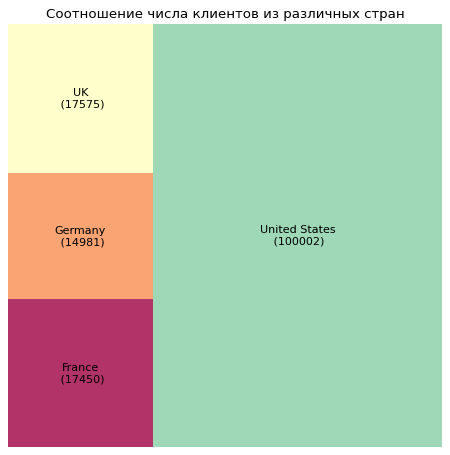

In [18]:
calc.square_plot(profiles, 'region', title='Соотношение числа клиентов из различных стран')

<Figure size 560x560 with 0 Axes>

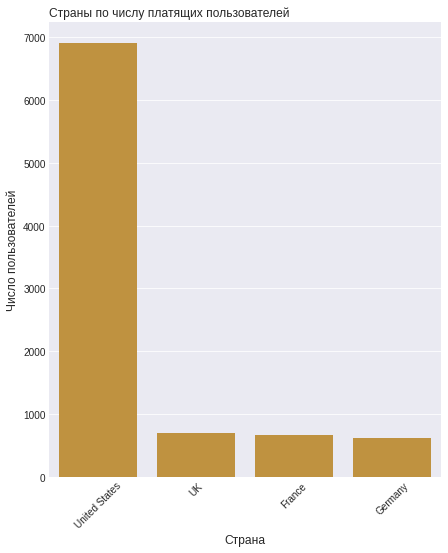

In [19]:
title = 'Страны по числу платящих пользователей'
xlabel = 'Страна'
ylabel = 'Число пользователей'
data = countries_count_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='страна', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**
- из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США,
- процент платящих по странам - 6.90% в США, 4.11% в Германии, 3.98% в Великобритании и 3.80% во Франции, 
- в датасете 150 008 уникальных пользователей, из которых платят 8881 (5.92%),
- из 8881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Под процентом платящих понимается соотношение числа платящих к числу пользователей, пришедших с конкретного устройства, так например для `US` - это 6902 /100002</div>


<div class="alert alert-info"> ✔️ Дополнил вывод, действительно не посчитал процент платящих, хотя и заявил в тексте, что буду считать. Вместе с тем, с формулировкой и содержанием замечания не согласен: посчитан был именно процент от платящих (то есть соотношение числа платящих из конкретной страны к общему числу платящих). И этот расчет нашел отражение в выводе - "из 8881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии". </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Согласен, есть возможность разночтений, отправил в контентный отдел обратную связь)
</div>


[В оглавление](#TOC)

### - устройства пользователей<a class='anchor' id='2_3_2'></a>

In [20]:
devices_by_payer = calc.grouped_summary(profiles, 'device', 'устройство')
devices_by_payer

,устройство,платящие,% от платящих,число клиентов,% платящих
0,PC,1537,17.31,30455,5.05
1,Mac,1912,21.53,30042,6.36
2,Android,2050,23.08,35032,5.85
3,iPhone,3382,38.08,54479,6.21
4,---,8881,100.00,150008,---


Визуализируем соотношение устройств по числу уникальных пользователей:

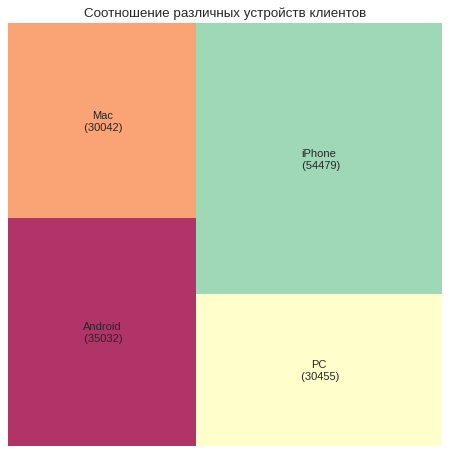

In [21]:
calc.square_plot(profiles, 'device', title='Соотношение различных устройств клиентов')

<Figure size 560x560 with 0 Axes>

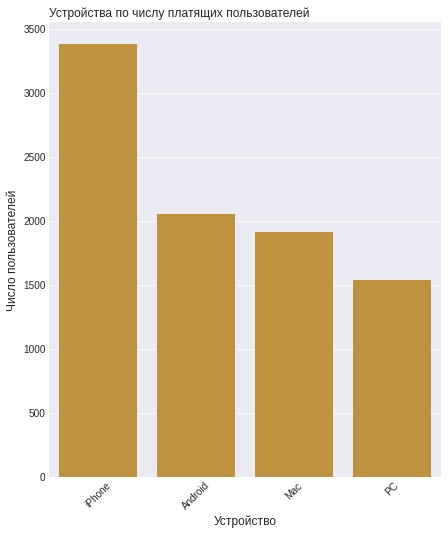

In [22]:
title = 'Устройства по числу платящих пользователей'
xlabel = 'Устройство'
ylabel = 'Число пользователей'
data = devices_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='устройство', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**
- клиенты пользвуются приложением с четырех устройств - PC, Mac, Android, iPhone,
- наблюдения об устройствах распределены равномернее, чем между странами,
- из 150 008 пользователей платящие используют больше всего MAC (6.36%), затем идут iPhone (6.21%), Android (5.85%) и PC (5.05%),
- из 8881 платящих - 3382 (38.08%) пользователей iPhone, 2050 (23.08%) пользователей Android, 1912 пользователей Mac (21.53%), пользователей PC (17.31%).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
   
Для того, чтобы избавиться от назойливого вывода `<AxesSubplot:title={'center':'Расходы на маркетинг'}, xlabel='dt'>
` можно добавить `;` в конец строки
    
</div>

[В оглавление](#TOC)

### - информация о покупках<a class='anchor' id='2_3_3'></a>

In [23]:
calc.orders.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
revenue,40212.00,5.37,3.45,4.99,4.99,4.99,4.99,49.99


In [24]:
calc.orders.describe(include=['object', 'datetime64[ns]']).T

,count,unique,top,freq,first,last
event_dt,40212,40163,2019-10-26 06:49:22,2,2019-05-01 00:28:11,2019-10-31 23:56:56


С учетом того, что 75%-процентиль - 4.99 (совпадающий с медианой, 25%-процентилем и минимуом), максимальная сумма выручки - 49.99, проверим какие значения выручки есть в датасете:

In [25]:
sorted(calc.orders.revenue.unique())

[4.99, 5.99, 9.99, 19.99, 49.99]

Всего пять значений стоимости услуги. Проверим сколько пользователей платят больше 4.99, возможно, таких пользователей стоит рассматривать отдельно:

In [26]:
max_revenue = calc.orders.groupby('revenue').agg({'user_id': 'count'}).reset_index()
max_revenue['%'] = (max_revenue['user_id'] / len(calc.orders)) * 100
max_revenue

,revenue,user_id,%
0,4.99,38631,96.07
1,5.99,780,1.94
2,9.99,385,0.96
3,19.99,204,0.51
4,49.99,212,0.53


Примерно 5% пользователей платят больше базовой стоимости. Посчитаем общее число таких пользователей:

In [27]:
sum(max_revenue[max_revenue['revenue'] > 4.99]['user_id'])

1581

&#9889; **Вывод**

В датасете с информацией о покупках:

- остутствуют сведения о валюте в которой выражена выручка,
- принимая во внимание, что 67% пользователей из США, можно предположить, что валюта выручки - доллары США,
- выявлено 5 различных стоимостей услуг - 4.99, 5.99, 9.99, 19.99, 49.99.
- минимальная сумма выручки - 4.99, средняя - 5.37 (при медианной и 75%-процентиле - 4.99), максимальная - 49.99,
- из 40 185 платящих пользователей - 1581 (4%) платит больше базового тарифа,
- самое раннее наблюдение о первом действии совпадает с датасетом о посещениях - 01.05.2019 года, самое позднее - 31.10.2019 года.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличная находка, низкий средний чек можно вынести как причину неокупаемости и рекомендовать отделу маркетинга повышать его</div>

[В оглавление](#TOC)

### - каналы привлечения пользователей<a class='anchor' id='2_3_4'></a>

In [28]:
channels_by_payer = calc.grouped_summary(profiles, 'channel', 'канал')
channels_by_payer

,канал,платящие,% от платящих,число клиентов,% платящих
0,MediaTornado,156,1.76,4364,3.57
1,YRabbit,165,1.86,4312,3.83
2,lambdaMediaAds,225,2.53,2149,10.47
3,OppleCreativeMedia,233,2.62,8605,2.71
4,LeapBob,262,2.95,8553,3.06
5,RocketSuperAds,352,3.96,4448,7.91
6,AdNonSense,440,4.95,3880,11.34
7,WahooNetBanner,453,5.10,8553,5.30
8,organic,1160,13.06,56439,2.06
9,TipTop,1878,21.15,19561,9.60


Визуализируем соотношение уникальных пользователей по источникам привлечения:

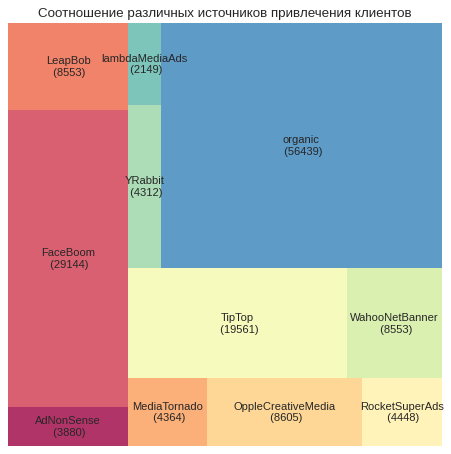

In [29]:
calc.square_plot(profiles, 'channel', title='Соотношение различных источников привлечения клиентов')

<Figure size 560x560 with 0 Axes>

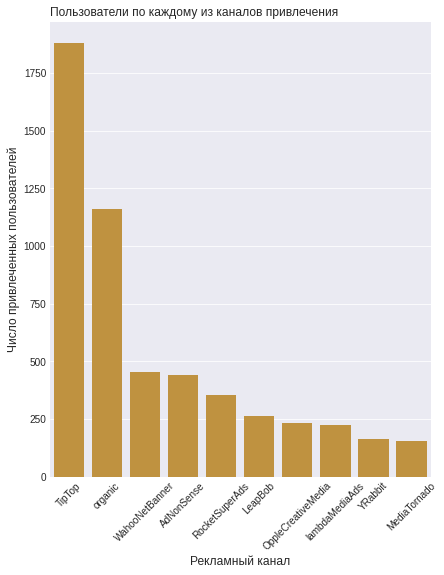

In [30]:
title = 'Пользователи по каждому из каналов привлечения'
xlabel = 'Рекламный канал'
ylabel = 'Число привлеченных пользователей'
data = channels_by_payer.iloc[:10].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='канал', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**

- одиннадцать источников привлечения клиентов: один естественный, без посредников, десять - рекламные каналы,
- без посредников пришло более трети уникальных пользователей - 56 439 (37.6 %), из которых 1160 конвертировались в платящих (2.06%),
- из 8881 платящих 61.2% пришли из двух источников - 3557 (40.05% от платящих пользователей) пользователей привел FaceBoom, 1878 (21.15% от платящих пользователей) TipTop,
- с учетом естественного источника (13.06% от платящих пользователей), FaceBoom и TipTop на - оставшиеся 25.74% от платящих пользователей приходятся на 8 других каналов.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Этот вывод и предыдущие изменятся, когда процент платящих будет пересчитан 
</div>

<div class="alert alert-info"> ✔️ Процент платящих просто не был посчитан - нечего было пересчитывать, ранее был посчитан процент от платящих (то есть соотношение числа платящих из конкретной страны к общему числу платящих) и это нашло отражение в выводах.</div>

[В оглавление](#TOC)

### - информация о расходах<a class='anchor' id='2_3_5'></a>

In [31]:
calc.costs.describe().T

,count,mean,std,min,25%,50%,75%,max
costs,1800.00,58.61,107.74,0.80,6.50,12.29,33.60,630.00


Минимально - 0.80, средняя стоимость источника - 58.61 (при медианой - 12.29 и 75%-процентиле равным 33.60). Есть очень дорогие источники. Проверим среднюю стоимость привлечения по каждому источнику в разрезе на клиента: 

In [32]:
# посчитаем сколько раз обращались к каждому источнику
applied_to_channel = (calc.costs.groupby('channel')
                                .agg({'dt': 'count'})
                                .reset_index()
                                .rename(columns={'channel': 'канал', 'dt': 'дней закупки трафика'}))

# посчитаем отдельно среднюю стоимость привлечения клиента по источнику, чтобы потом не избавляться от мультиндекса
channels_acquisition_costs = (profiles.groupby('channel')
                               .agg({'acquisition_cost': 'mean'})
                               .reset_index()
                               .rename(columns={'channel': 'канал',
                                                'acquisition_cost': 'затраты на привлечение'}))

# посчитаем затраченную на каждый из каналов сумму и % от бюджета
channels_costs = (profiles.groupby('channel')
                          .agg({'acquisition_cost': 'sum'})
                          .reset_index()
                          .sort_values(by='acquisition_cost'))
channels_costs['% от рекламного бюджета'] = (channels_costs['acquisition_cost'] * 100 / 
                                             sum(channels_costs['acquisition_cost']))
channels_costs = channels_costs.rename(columns={'channel': 'канал',
                                                'acquisition_cost': 'сумма трат',
                                                'acquisition_cost_y': 'средняя стоимость'})

# объединим таблицу с затратами с таблицей обращений и числом привлеченных
channels_costs = channels_costs.merge(channels_by_payer, on='канал')
channels_costs = channels_costs.merge(channels_acquisition_costs, on='канал')
channels_costs = channels_costs.merge(applied_to_channel, on='канал')

# дополним таблицу строкой с естественным источником
organic_row = channels_by_payer.query('канал == "organic"')
channels_costs = channels_costs.append(organic_row, ignore_index=True).fillna(0)

# дополним таблицу суммирующую строку
sums_row = pd.Series(['---', sum(channels_costs['сумма трат']),
                      sum(channels_costs['% от рекламного бюджета']),
                      sum(channels_costs['платящие']),
                      sum(channels_costs['% от платящих']),
                      sum(channels_costs['число клиентов']),
                      sum(channels_costs['% платящих']),
                      channels_costs['затраты на привлечение'].mean(),
                      sum(channels_costs['дней закупки трафика'])],
                      index=channels_costs.columns)
channels_costs = channels_costs.sort_values(by='сумма трат')
channels_costs = channels_costs.append(sums_row, ignore_index=True)

channels_costs

,канал,сумма трат,% от рекламного бюджета,платящие,% от платящих,число клиентов,% платящих,затраты на привлечение,дней закупки трафика
0,organic,0.00,0.00,1160,13.06,56439,2.06,0.00,0.00
1,YRabbit,944.22,0.90,165,1.86,4312,3.83,0.22,180.00
2,MediaTornado,954.48,0.90,156,1.76,4364,3.57,0.22,180.00
3,lambdaMediaAds,1557.60,1.48,225,2.53,2149,10.47,0.72,180.00
4,LeapBob,1797.60,1.70,262,2.95,8553,3.06,0.21,180.00
5,RocketSuperAds,1833.00,1.74,352,3.96,4448,7.91,0.41,180.00
6,OppleCreativeMedia,2151.25,2.04,233,2.62,8605,2.71,0.25,180.00
7,AdNonSense,3911.25,3.71,440,4.95,3880,11.34,1.01,180.00
8,WahooNetBanner,5151.00,4.88,453,5.10,8553,5.30,0.60,180.00
9,FaceBoom,32445.60,30.75,3557,40.05,29144,12.20,1.11,180.00


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Средняя стоимость клиента рассчитана неверно, ведь это не сумма всемх других стоимостей
* Всё же не число обращений, а число дней сколько отдела маркетинга закупал трафик у конкретного канала. Как раз везде 180 - наблюдаемый интервал, если захочешь, этот столбец можно и убрать
    
</div>


<div class="alert alert-info"> ✔️ Исправил "стоимость клиента" на "затраты на привлечение" (в столбце именно acquisition_cost - взят из профиля, способ расчета из теории). Исправил "число обращений" на "дней закупки трафика" - почему можно убирать столбец неясно: нельзя исключить, что где-то могло оказаться не 180.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Затрата на привлечение - средняя стоимость привлечения по каналу, соответственно по всему проекту тоже должно быть среднее, а не сумма всех затрат привлечения. Ниже демонстрирую, что разница существенная 
</div>

<div class="alert alert-info"> ✔️ Спасибо! Считал сумму средних вместо среднего по проекту.</div>

Визуализируем траты на каналы:

<Figure size 560x560 with 0 Axes>

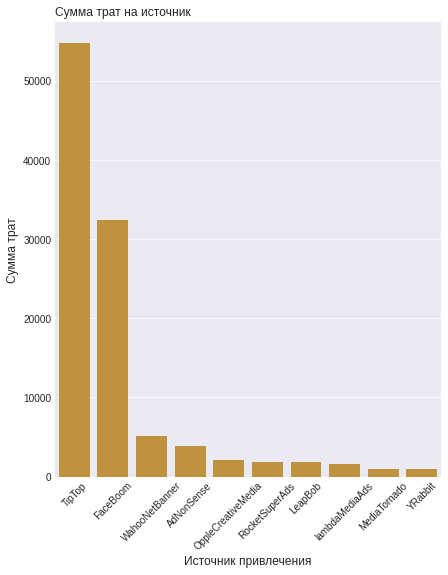

In [33]:
data = channels_costs.query('канал not in ["organic", "---"]').sort_values(by='сумма трат', ascending=False)
ylabel = 'Сумма трат'
xlabel = 'Источник привлечения'
title = 'Сумма трат на источник'
calc.sns_catplot(x='канал', y='сумма трат', data=data, xlabel=xlabel, ylabel=ylabel, title=title)

&#9889; **Вывод:**

- у каждому из рекламных источников закупали трафик 180 дней,
- самое раннее наблюдение о понесенных расходах - 01.05.2019 года, самое позднее - 27.10.2019 года,
- за период от 01.05.2019 до 27.10.2019 года потратили 105 497 долларов,
- львиная доля бюджета 87 196.90 долларов (82.65%) направлена на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%).
- самая высокая стоимость привлечения у TipTop - 2.80 долларов, на втором месте FaceBoom - 1.11 долларов, на третьем месте AdNonSense - 1.01 доллар, в остальных источника в дипазоне от 21 до 60 центов,
- кроме FaceBoom и TipTop требуется проверить AdNonSense - через канал приходит совсем мало новых пользователей (3880), и хотя 11% (440) стали платить, стоимость привлечения в 1.01 доллар соперничает с FaceBoom. То есть канал может быть и эффективный, но из-за масштаба траты на него не оправданы,
- исходя из представленных данных, представляется, что самый неэффективный канал TipTop - канал обеспечил 21.15% (1878) от всех платящих (8881), но сумма трат на канал - 54751.30 долларов, стоимость привлечения 2.80 долларов выбивается из общего ряда.


[В оглавление](#TOC)

### - сравним TipTop со всеми остальными платными каналами<a class='anchor' id='2_3_6'></a>

In [34]:
# отберем TipTop
tip_top = pd.DataFrame(channels_costs.query('канал == "TipTop"').sum()).reset_index()
tip_top = tip_top.rename(columns={'index': 'аттрибут', 0: 'TipTop'})

# отберем остальных, суммируем их результаты
others = pd.DataFrame(channels_costs.query('канал not in ["TipTop", "organic", "---"]').sum()).reset_index()
others = others.rename(columns={'index': 'аттрибут', 0: 'остальные'})

tip_top.merge(others, on='аттрибут').drop([0, 6, 7])

,аттрибут,TipTop,остальные
1,сумма трат,54751.30,50746.00
2,% от рекламного бюджета,51.90,48.10
3,платящие,1878,5843
4,% от платящих,21.15,65.79
5,число клиентов,19561,74008
8,дней закупки трафика,180.00,1620.00


&#9889; **Вывод:**

- TipTop не оправдывают себя: сумма трат превышает все девять источников вместе взятые на 4005,30 долларов, но он приводит в три раза меньше новых клиентов (19561 против 74008), и в три раза меньше платящих клиентов (1878 - 21.15% против 5843 - 65.79%).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный вывод, стоимость привлечения на `Tip Top` его главная проблема, так и есть)</div>


[В оглавление](#TOC)

## Выводы по итогам EDA<a class="anchor" id="2_conclusion"></a>

Исходя из представленных данных данных можно сделать выводы:


**1. Минимальная и максимальная даты привлечения пользователей**
- самое раннее наблюдение о первом действии - 01.05.2019 года, самое позднее - 31.10.2019 года,


**2. Страны происхождения посетителей и клиентов**
- клиенты приходят из четырех стран – США, Великобритании, Франции и Германии,
- из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США,
- в датасете 150 008 уникальных пользователей, из которых платят 8881 (6%),
- из 8 881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии,
- отсутствуют сведения о валюте в которой выражена выручка: принимая во внимание, что 67% пользователей из США, можно предположить, что валюта выручки - доллары США,


**3. Устройства посетителей и клиентов**
- клиенты пользуются приложением с четырех устройств - PC, Mac, Android, iPhone,
- из 8881 платящих – 3 382 (38.08%) пользователей iPhone, 2 050 (23.08%) пользователей Android, 1912 пользователей Mac (21.53%), пользователей PC (17.31%).


**4. Источники привлечения посетителей и клиентов**
- привлечение клиентов идет по одиннадцати источникам: один естественный, без посредников, десять - рекламные каналы,
- без посредников пришло более трети уникальных пользователей - 37.6 % (56 439),  32% (48 705) привели FaceBoom и TipTop, на оставшиеся 8 источников приходится 29% (44 864) от уникальных клиентов,
- из платящих клиентов 61.2% пришли из двух источников – 3 557 (40.05%) пользователей привел FaceBoom, 1 878 (21.15%) TipTop, 25.74% (2  286) приходятся на 8 других каналов, - еще 13.06% (1160) конвертировались из естественного трафика,


**5. Расходы на рекламу**
- за период от 01.05.2019 до 27.10.2019 года на рекламу потратили 105 497 долларов,
- период закупки трафика - 180 дней,
- львиная доля бюджета - 87 196.90 долларов (82.65%) направлена на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%),
- самая высокая стоимость привлечения у TipTop - 2.80 долларов, на втором месте FaceBoom - 1.11 долларов, на третьем месте AdNonSense - 1.01 доллар, привлечение клиентов из остальных источников обошлось в среднем в стоимость от 60 центов от 21 цента.


**6. Неээфективные источники**
- TipTop не оправдывает себя: сумма трат превышает все девять источников вместе взятые на 4005,30 долларов, но он приводит в три раза меньше новых клиентов (19561 против 74008), в три раза меньше платящих клиентов (1878 - 21.15% против 5843 - 65.79%) при средней стоимости одного клиента 2.80 долларов,
- кроме FaceBoom и TipTop требуется проверить AdNonSense - через канал приходит совсем мало новых пользователей (3880): и хотя 11% (440) стали платить стоимость клиента в 1.01 доллар соперничает с FaceBoom. Канал может быть и эффективный, но из-за масштаба траты на него не оправданы.



[В оглавление](#TOC)

# III. Маркетинговый анализ<a class='anchor' id='3'>
***

## 1) Проверим окупаемость рекламы<a class="anchor" id="3_1"></a>

Рассчитаем и визуализируем LTV и ROI

In [35]:
profiles = profiles.query('channel != "organic"')

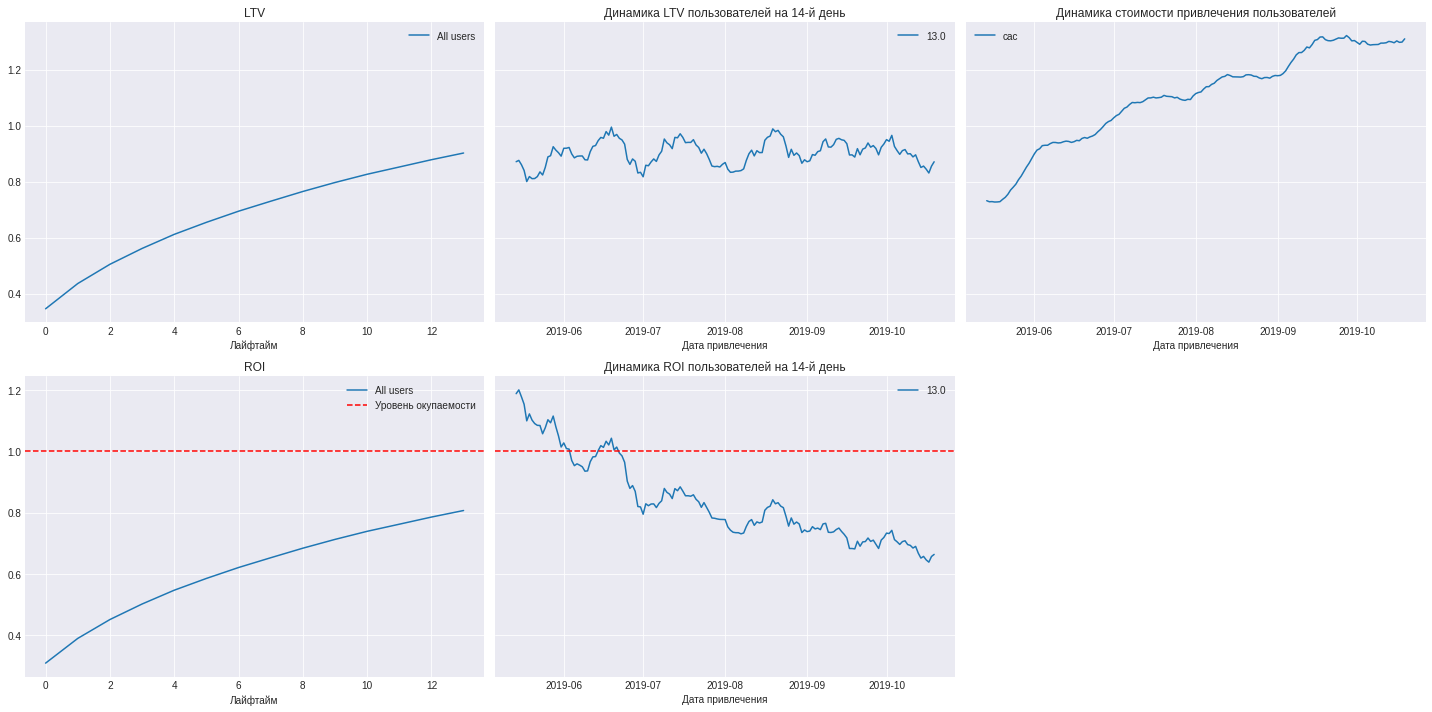

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- реклама не окупается в течение 14 дней: ROI в конце периода так и не пересакает границу окупаемости.
- динамика LTV сравнительно стабильна, следовательно, качество клиентов не должно оказывать существенного влияния,
- CAC нестабилен - на графике существенный рост рекламного бюджета, и обратно пропорциональное ему снижение динамики ROI,

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️
    
Здесь и ниже при анализе стоит исключать органический трафик, мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств. Соответственно и выводы после этих правок могут поменяться, поэтому жду исключения из дальнейшего анализа всех органических пользователей и после этого прокомментирую оставшуюся часть проекта. </div>


<div class="alert alert-info"> ✔️ Убрал органический трафик из анализа. В целом, на выводы не повлияло - только при проверке в разрезе по устройствам без органического трафика андройд опустился ниже окупаемости.<br>
Исключение органического трафика - выглядит сужением поставленной задачи. Вот формулировк: "Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс".<br>
Исходя из условий задачи, принимая во внимание, что органический трафик часть явления, учитывая, что данных все равно недостаточно для выявления окончательной причины убытков (и это не обязательно только расходы на рекламу) - не согласен, что из анализа следует исключить органический трафик.<br>
С точки зрения убытков компании проблемы органических пользователей также влияют на убыточность - потому что у них ровно те же потенциальные проблемы: и утрата заинтересованности в приложении, и сезонность, и технические проблемы. Более того, как раз ребята, которые сами приходят в приложение, потому что им просто нравится, платят и, надеюсь, рассказывают о нем друзьям, коллегам и домашним питомцам - самые ценные. <br>
В принципе, можно ведь довести логику до точки - и если ни один из рекламных каналов не окупается - давайте уволим отдел маркетинга, снижение издержек. Или, если например, по какому-то устройству без учета органического трафика не будет достигнута окупаемость можно предложить перестать распространять на этом устростве - в то время как большинство органических пользователей как раз из него и приходят.<br>
Как можно не учитывать органический трафик - совершенно непонятно. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Влияние закупки на органику не такое явное. А учет органики завышает показатели и как будто бы ситуация выглядит более радужной 
</div>


[В оглавление](#TOC)

## 2) Проверим характеристики пользователей<a class="anchor" id="3_2"></a>

### - страну первого посещения пользователей<a class='anchor' id='3_2_1'></a>

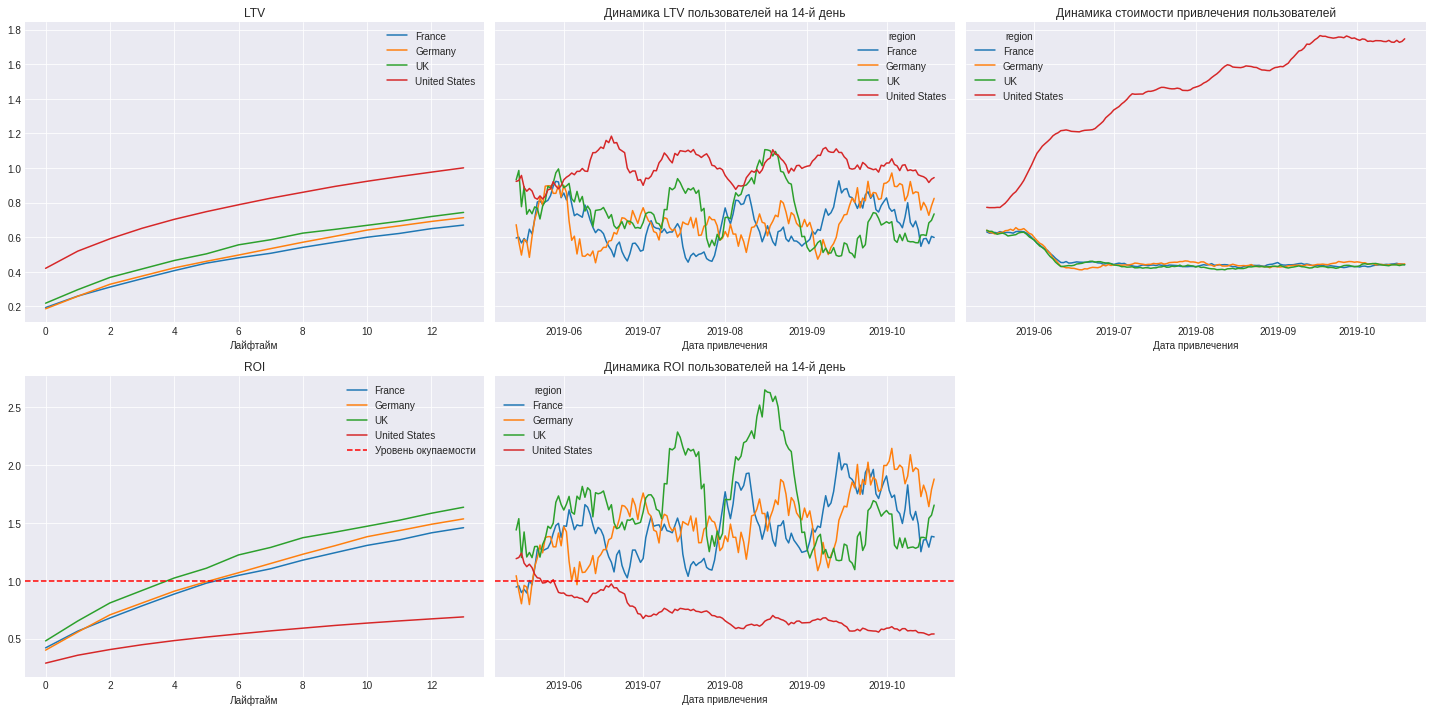

In [37]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- рекламный бюджет стали активно тратить на пользователей из США (взрывной рост расходов по сравнению с иными странами),
- реклама в отношении пользователей из США сработала - новых пользователей привлекли,
- однако новые пользователи из США плохо конвертируются - отрицательная динамика ROI и, в целом, к концу двухнедельного периода ROI в районе 80%
- фактически, из четырех стран в которых продают приложение - убыточны только США,
- ранее выявленные аномальные источники привлечения - TipTop, FaceBoom и AdNonSense - возможно, связаны именно с рекламой в США.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема.
</div>

[В оглавление](#TOC)

### - источник привлечения пользователей<a class='anchor' id='3_2_2'></a>

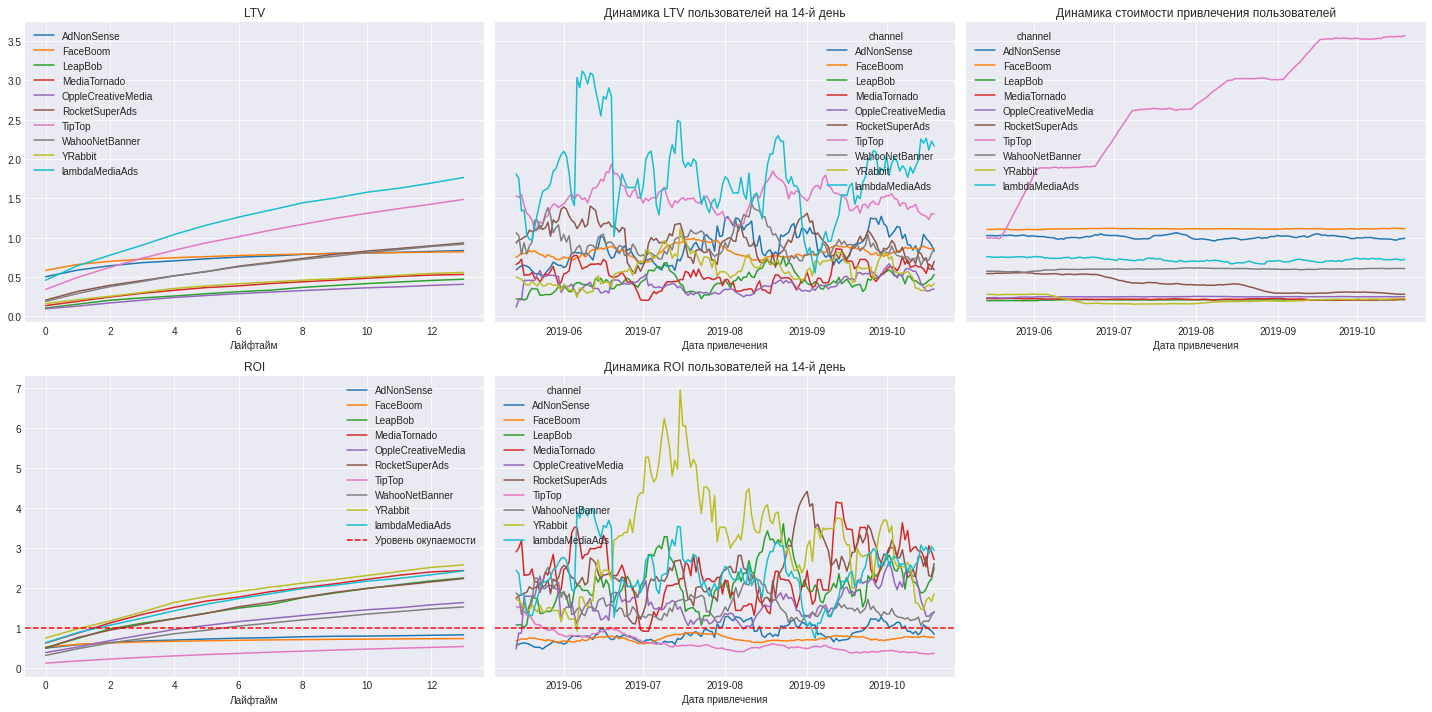

In [38]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- как и предполагалось, TipTop, FaceBoom и AdNonSense не окупаются, в отличие от других источников,
- TipTop, FaceBoom и AdNonSense показывают отрицательную динамику ROI, при стабильном качестве пользователей,
- расходы на TipTop носят взырывной характер - кратное увеличение от когорты к когорте.

 
<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>

[В оглавление](#TOC)

### - проверим связь пользователей из США и канал привлечения<a class='anchor' id='3_2_3'></a>

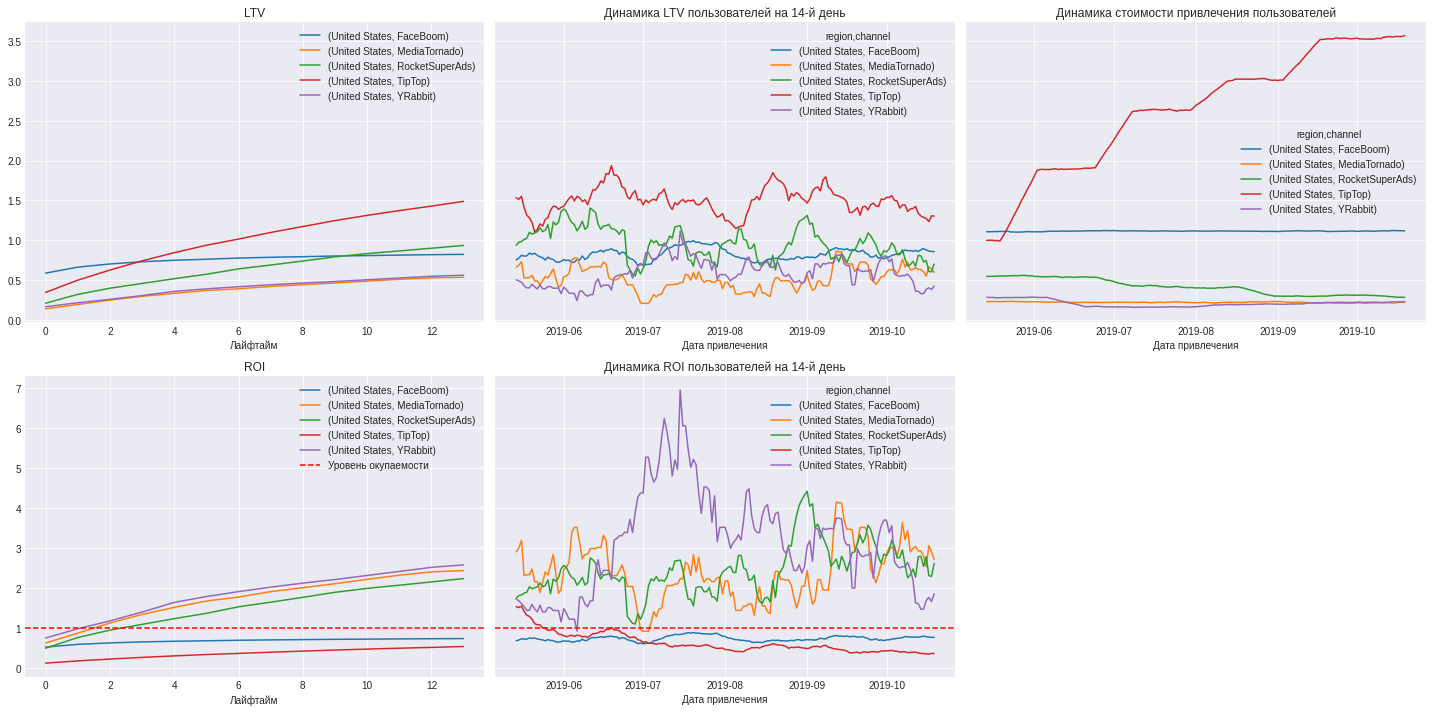

In [39]:
dimensions = ['region', 'channel']
usa_profiles = profiles.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(usa_profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- пользователей из США привлекают из пяти каналов: TipTop, FaceBoom, RocketSuperAds, YRabbit, MediaTornado.
- как и в общей картине - TipTop, FaceBoom - не окупаются, динамика ROI отрицательная,
- при этом, как раз в отношении TipTop от когорты к когорте растут затраты, при том, что начальная стоимость - ниже FaceBoom (расходы на который стабильны),
- возможно, условия размещения рекламы в TipTop следует пересмотреть, равномерный рост расходов от месяца к месяцу при отсутствии существенных колебаний в динамике LTV может свидетельствовать об невыгодных условиях в определении цены размещения,
- в случае, если условия размещения нельзя пересмотреть - от TipTop следует отказаться,
- кроме TipTop, принимая во внимание результаты от размещения рекламы, FаceBoom представлятся невыгодным для размещения,
- любопытно, что с помощью AdNonSense не привлечкают пользователей из США, что не отменяет их возможную неэффективность - проверим отдельно каналы на окупаемость.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Отличная идея рассмотреть отдельно каналы на `US`. Можно было бы здесь посмотреть разбивку каналов по странам, там есть интересные взаимосвязи
    
</div>


[В оглавление](#TOC)

### - проверим каналы на окупаемость<a class='anchor' id='3_2_4'></a>

Выделим все источники, которые не окупились к концу второй недели:

In [40]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
roi_grouped[roi_grouped[13] < 1]

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.01,0.50,0.58,0.64,0.68,0.70,0.73,0.75,0.76,0.78,0.80,0.80,0.81,0.82,0.83
FaceBoom,27544,1.11,0.53,0.59,0.63,0.65,0.67,0.68,0.70,0.70,0.71,0.72,0.72,0.73,0.73,0.74
TipTop,18498,2.76,0.12,0.18,0.23,0.27,0.31,0.34,0.37,0.40,0.42,0.45,0.48,0.50,0.52,0.54


&#9889; **Вывод:**

- из десяти платных источников не окупаются AdNonSense (ROI - 0.83), FaceBoom (ROI - 0.74), TipTop (ROI - 0.54),
- FaceBoom и TipTop привлекают много, с отрывом, новых пользователей, но они не конвертируются в платящих с достаточной динамикой,
- исходя из представленных данных, расходы на FaceBoom и TipTop в США - факторы, способствующие убыточности.

[В оглавление](#TOC)

### - устройство пользователей<a class='anchor' id='3_2_5'></a>

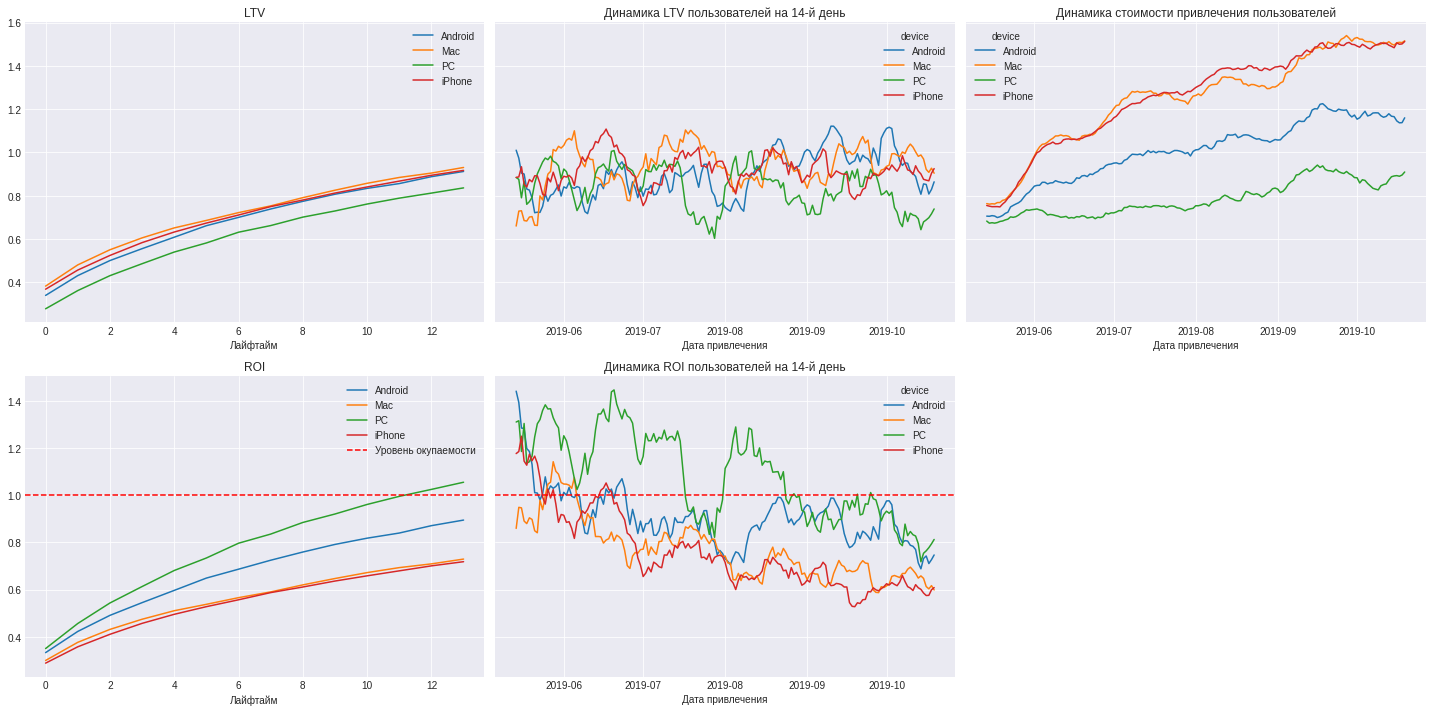

In [41]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- на графиках Android, iPhone и Mac лежат ниже порога окупаемости, с отрицательной динамикой ROI к концу двухнедельного периода. 
- динамика стоимости привлечения пользователей синхронно растет в разрезе по устройствам, так что преждевременно делать вывод о том, что следует отказать от распространения на Android, iPhone и Mac - проверим, не оказывает ли влияние конкетный регион - США.

[В оглавление](#TOC)

### - устройство пользователей и европейский рынок<a class='anchor' id='3_2_6'></a>

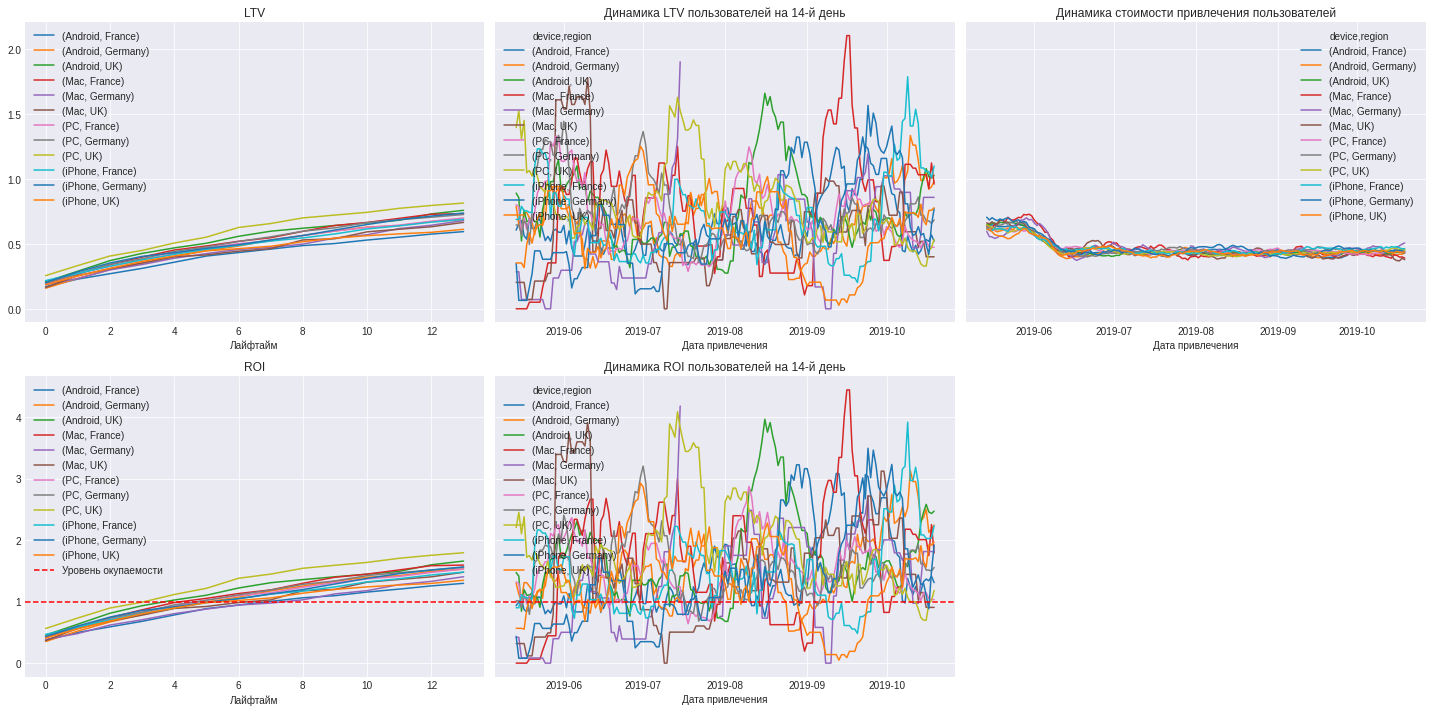

In [42]:
dimensions = ['device', 'region']
not_usa_profiles = profiles.query('region != "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(not_usa_profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- европейский рынок окупается на всех устройствах,
- привлекает внимание волатильность динамики LTV и ROI, есть даже существенные провалы - позже проверим конверсию и удержание,
- с учетом результатов - фактор устройства в вопросе окупаемости можно исключить.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️

Это подтверждает, что проблема в `US` 
</div>


[В оглавление](#TOC)

## 3) Проверим конверсию<a class="anchor" id="3_3"></a>

### - посчитаем общую конверсию<a class='anchor' id='3_3_1'></a>

In [43]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days)

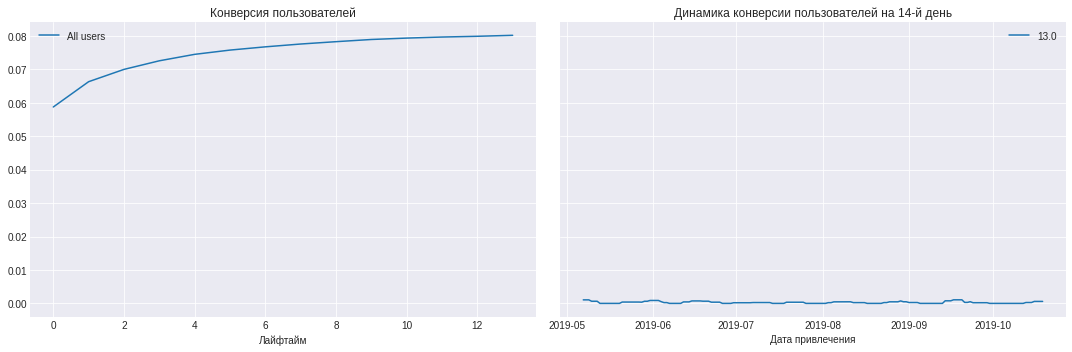

In [44]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- конверсия в районе 8%,
- достаточно надежного источника с анализом конверсии развлекательных приложений на 2019 год не удалось найти, исходя из данных [gamesindustry.biz](https://www.gamesindustry.biz/articles/2019-10-01-on-average-it-costs-usd35-42-to-get-a-mobile-gamer-to-make-first-in-app-purchase) на 01.10.2019 года - в игровых приложениях в тот период в среднем конверсия составляла 10,56% (резюмирая абзац про конверсию в покупку; к сожалению исследование на которое ссылается заметка уже обновилось),
- учитывая, что в нашем случае речь идет о немного менее привлекательной категории - entertainment - с некоторой осторожностью можно предположить, что конверсия по состоянию на 2019 год в районе 8% вполне хорошая (и, может даже, отличная).

<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>☁️

Конверсия ведь на первый лайфтайм равна конверсии на 0 + конверсия на 1, а у тебя получается, что они не суммируются, поэтому и такая наблюдаемая картина 
</div>


<div class="alert alert-info"> ✔️ Исправил, спасибо.</div>

[В оглавление](#TOC)

### - посчитаем  конверсию по регионам<a class='anchor' id='3_3_2'></a>

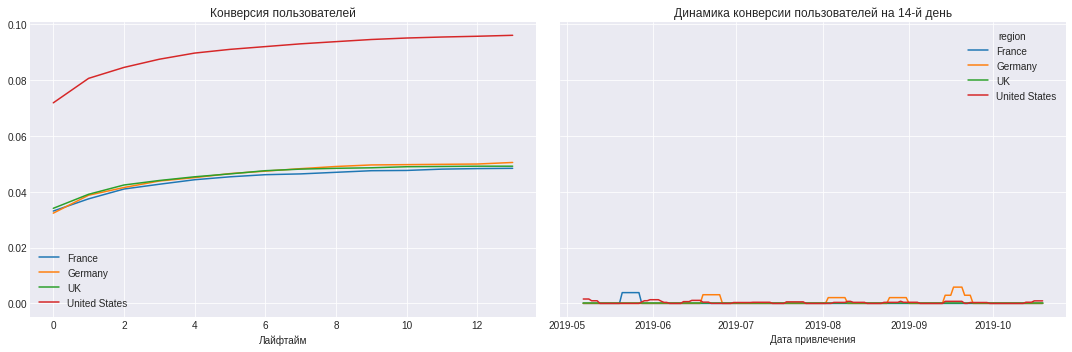

In [45]:
dimensions = ['region']
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- пользователи из США конвертируется вдвое лучше пользователей из Европы.

[В оглавление](#TOC)

### - посчитаем  конверсию по каналам<a class='anchor' id='3_3_3'></a>

In [46]:
dimensions = ['channel']

In [47]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)

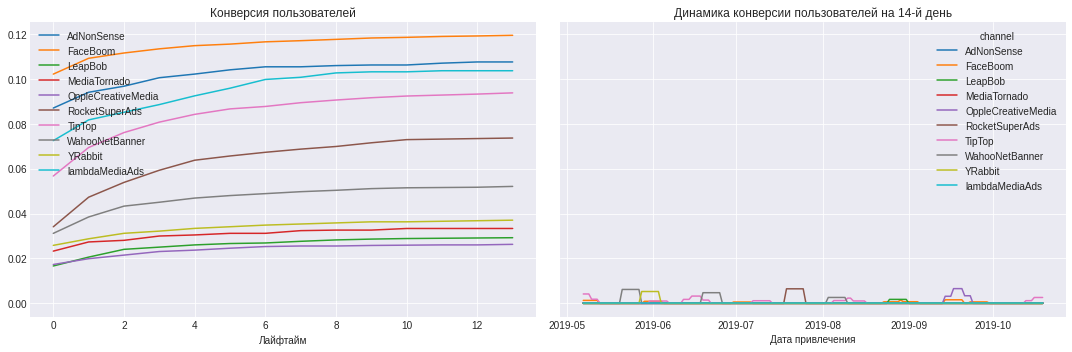

In [48]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- FaceBoom, AdNonSense, LambdaMediaAds показывают лучшую конверсию - выше 10%,
- несмотря на конверсию FaceBoom и AdNonSense среди неэффективных каналов.

[В оглавление](#TOC)

### - посчитаем  конверсию по устройствам<a class='anchor' id='3_3_4'></a>

In [49]:
dimensions = ['device']

In [50]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)

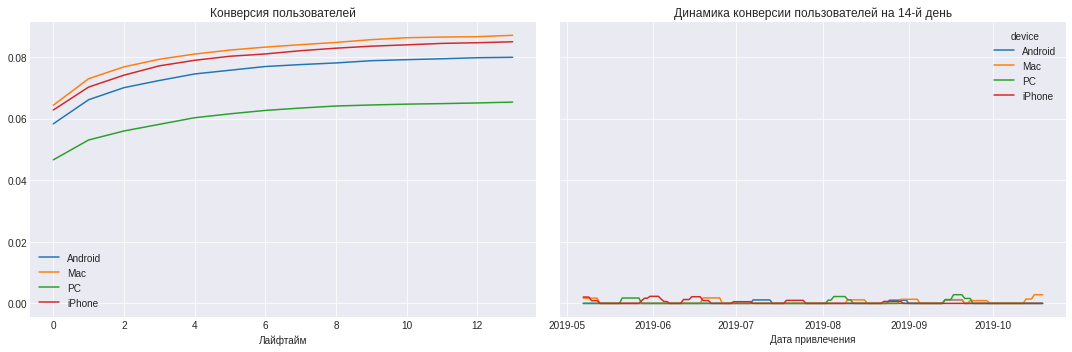

In [51]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- конверсию пользователей PC ниже пользователей других устройств,
- без данных о сущностном содержании и взаимодействии пользователей с приложением затруднительно с разумной степенью достоверности предположить причину более низкой конверсии пользователей PC, но это повод для дополнительного исследования.

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Существенные отличия каналов, устройства, стран появятся после изменения способа расчета конверсий
</div>

<div class="alert alert-info"> ✔️</div>

[В оглавление](#TOC)

### - посчитаем длительность пользовательской сесии<a class='anchor' id='3_3_5'></a>

Сведения о посещениях хранятся в таблице visits. Колонки, отвечающие за начало и конец сессии - session_start и session_end уже приведены к нужному типу datetime. Сделаем копию таблицы для анализа, выделим месяц сессии:

In [52]:
sessions_df = calc.visits.copy()
sessions_df['session_month'] = sessions_df['session_end'].dt.month

Посчитаем количество среднее число сессий на пользователей:

In [53]:
sessions_per_user = sessions_df.groupby('session_month').agg({'user_id': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_month,,,
5,45737,27095,1.69
6,44608,26032,1.71
7,47981,26681,1.80
8,55986,31066,1.80
9,56616,31865,1.78
10,58959,31202,1.89
11,14,14,1.00


Посчитаем среднюю и медианную продолжительность сессий:

In [54]:
sessions_df['session_duration_sec'] = (sessions_df['session_end'] - sessions_df['session_start']).dt.seconds

sessions_df['session_duration_sec'].mean() / 60, sessions_df['session_duration_sec'].median() / 60

(30.00151446214544, 20.733333333333334)

Проверим распределение:

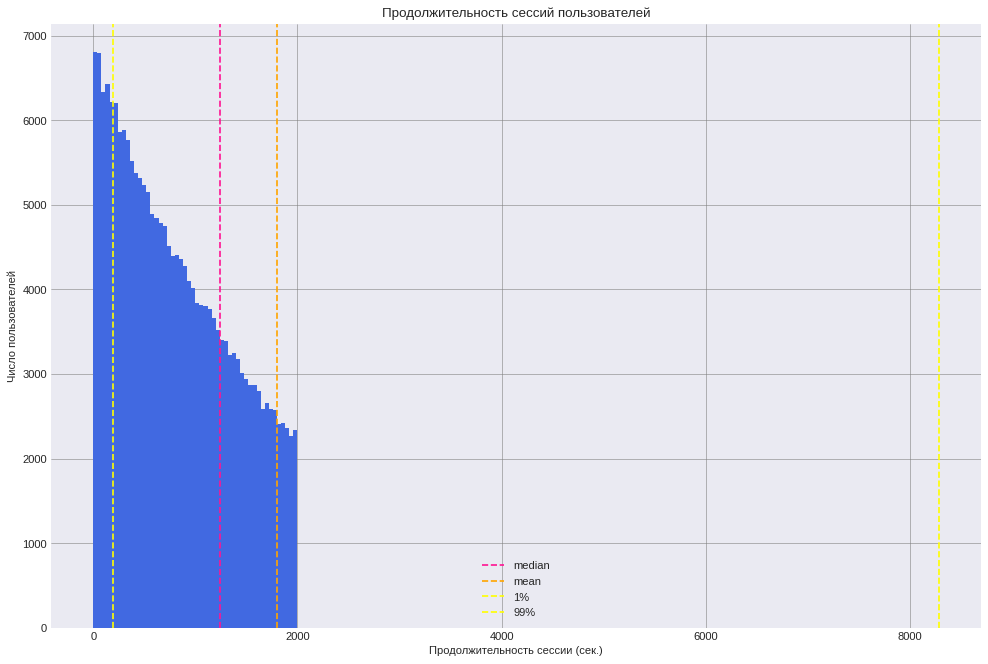

In [55]:
xlabel = 'Продолжительность сессии (сек.)'
ylabel = 'Число пользователей'
title = 'Продолжительность сессий пользователей'
calc.histogram(sessions_df['session_duration_sec'], 50, 0, 2000, x_label=xlabel, y_label=ylabel, title=title)

<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>☁️

Хотелось бы, чтобы на графиках присутствовали подписи осей, заголовок
</div>


<div class="alert alert-info"> ✔️</div>

Есть очень длинные, аномальные, сессиями - более двух часов. Большинство уложилось в получасовой период. Выделим пользователей с продолжительностью сессии более получаса, построим гистограмму:

In [56]:
more_then_half_an_hour = sessions_df[sessions_df['session_duration_sec'] > 1800]
more_then_half_an_hour

,user_id,region,device,channel,session_start,session_end,session_month,session_duration_sec
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,5,4963
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56,5,3904
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39,5,3918
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17,5,1997
10,589320347244,United States,Mac,YRabbit,2019-05-01 18:39:23,2019-05-01 20:03:15,5,5032
...,...,...,...,...,...,...,...,...
309890,778541543409,UK,Android,lambdaMediaAds,2019-10-31 00:16:21,2019-10-31 00:54:39,10,2298
309893,805154517300,France,iPhone,LeapBob,2019-10-31 07:07:13,2019-10-31 07:38:52,10,1899
309895,95774241409,UK,PC,OppleCreativeMedia,2019-10-31 11:14:15,2019-10-31 11:50:29,10,2174
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29,10,4277


113905 сессий - почти 37%. Проверим на каких устройствах зафиксированы сессии более получаса.

In [57]:
more_then_half_an_hour.groupby('device').agg({'user_id': 'count'})

,user_id
device,
Android,26926
Mac,22768
PC,22932
iPhone,41279


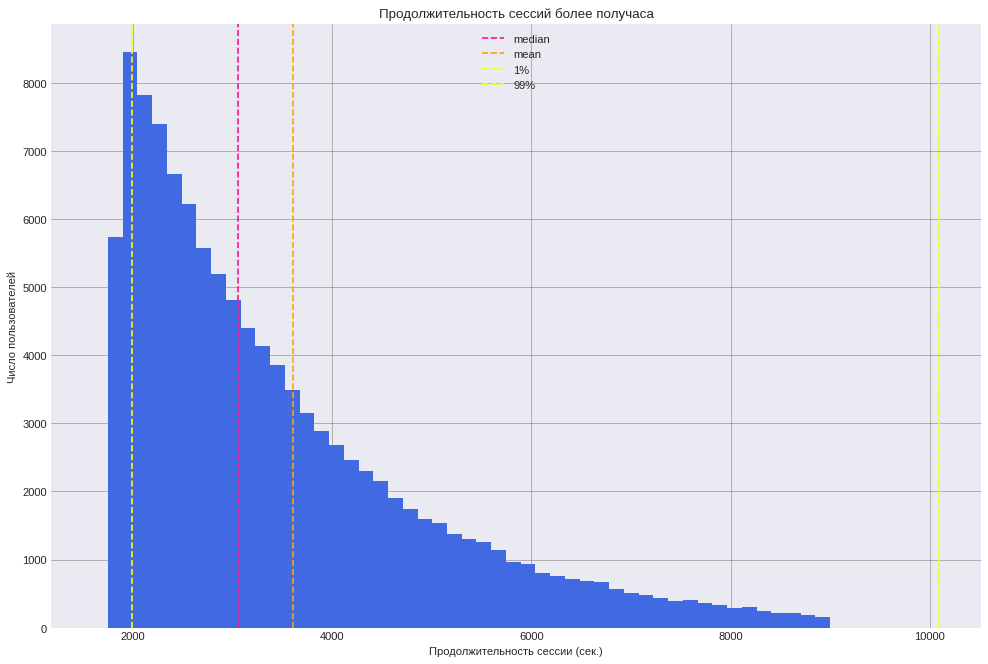

In [58]:
xlabel = 'Продолжительность сессии (сек.)'
ylabel = 'Число пользователей'
title = 'Продолжительность сессий более получаса'
calc.histogram(more_then_half_an_hour['session_duration_sec'], 50, 1600, 9000, x_label=xlabel, y_label=ylabel, title=title)

### - проверим, различаются ли средняя длительность сессии в зависимости от канала привлечения<a class='anchor' id='3_3_6'></a>

In [59]:
sessions_df.groupby('channel').agg({'session_duration_sec': 'mean'})

,session_duration_sec
channel,
AdNonSense,1782.37
FaceBoom,1801.12
LeapBob,1801.98
MediaTornado,1780.26
OppleCreativeMedia,1777.90
RocketSuperAds,1811.03
TipTop,1812.31
WahooNetBanner,1765.90
YRabbit,1837.70


### - проверим, различаются ли средняя длительность сессии в зависимости от устройства<a class='anchor' id='3_3_7'></a>

In [60]:
sessions_df.groupby('channel').agg({'session_duration_sec': 'mean'})

,session_duration_sec
channel,
AdNonSense,1782.37
FaceBoom,1801.12
LeapBob,1801.98
MediaTornado,1780.26
OppleCreativeMedia,1777.90
RocketSuperAds,1811.03
TipTop,1812.31
WahooNetBanner,1765.90
YRabbit,1837.70


### - проверим, различаются ли средняя длительность сессии в зависимости от статуса пользователя<a class='anchor' id='3_3_8'></a>

In [61]:
sessions_df = sessions_df.merge(profiles[['user_id', 'payer']], on='user_id')
sessions_df.groupby('payer').agg({'session_duration_sec': 'mean'})

,session_duration_sec
payer,
False,1799.76
True,1796.92


&#9889; **Вывод:**

- в среднем пользователь проводит в приложении менее двух сессий,
- средняя продолжительность сессии - 30 минут, медианная - 21 минуту,
- почти 37% пользователей проводят в приложении более получаса,
- существенных различий во времени сессии в зависимости от устройства, канала привлечения, статуса не выявлено, 
- исходя из представленных данных, принимая во внимание отсутствие подробного описания приложения, затруднительно сделать вывод с разумной степенью достоверности - являются ли сверхдлительные сессии систематической технической ошибкой или у приложения специфическая аудитория, это требует уточнения,
- если исходить из того, что у приложения специфическая аудитория - возможно, в сочетании с продолжительностью сессии количество средних посещений не стоит рассматривать как низкое,
- представляется, что отсюда и следует неэффективность рекалмы в США - TipTop и FaceBoom расчитаны на массовую аудиторию, не готовую в большинстве случаев инвестировать в длительные сессии (а уж говоря о пользователях из TipTop отдельно - совершенно точно не готовы).

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Рекомендую разделять статистику по платящим и нет, разница попрой бывает существенной 
</div>


<div class="alert alert-info"> ✔️ Дополнил</div>

[В оглавление](#TOC)

## 4) Проверим удержание<a class="anchor" id="3_4"></a>

### - посчитаем общее удержание<a class='anchor' id='3_4_1'></a>

In [62]:
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days)

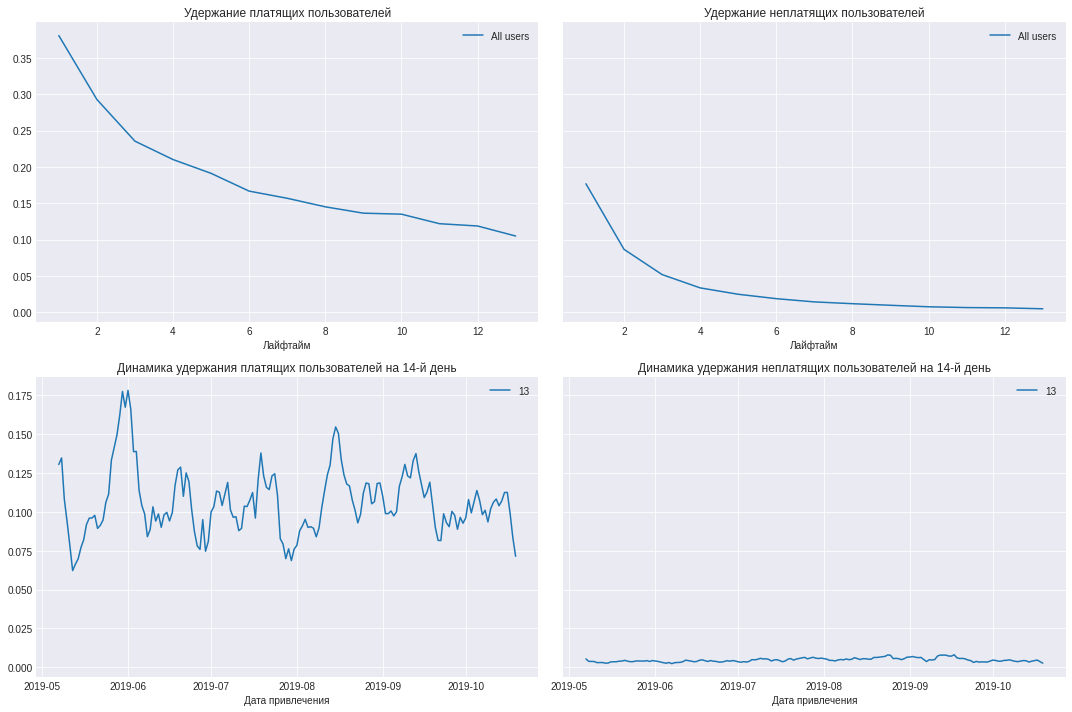

In [63]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- общее удержание невысокое, что укладывается в общую картину - уже установлено, что в среднем пользователи заходят в приложение менее двух раз

[В оглавление](#TOC)

### - посчитаем удержание по регионам<a class='anchor' id='3_4_2'></a>

In [64]:
dimensions = ['region']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

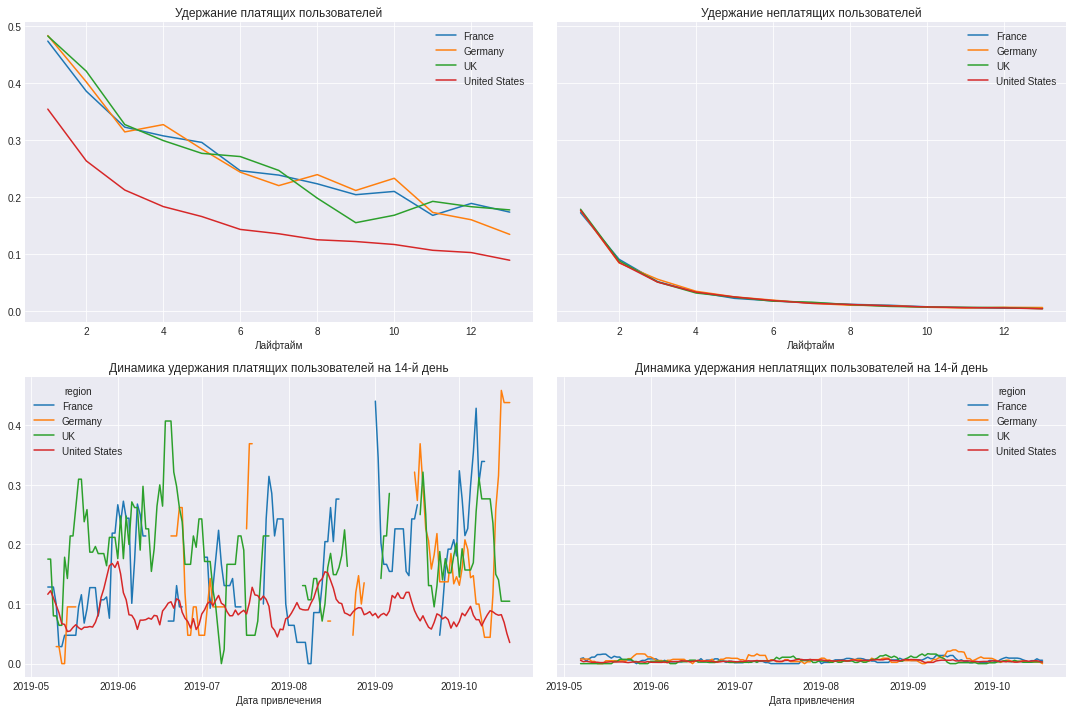

In [65]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- даже с учетом того, что общее удержание невысокое, пользователи из США удерживаются стабильно хуже других.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной.  Ну и не смущает ли тебя прерывистость динамики удержания?
</div>

<div class="alert alert-info"> Отсутствуют данные - это может быть и технические проблемы на стороне поставщика данных, или, возможно, связано с бизнес-процессом: не в каждом канале и не для каждой страны закупали трафик в каждый из возможных периодов - что вполне ок, тут может быть своя логика - в том числе, свзянная с бюджетом, post hoc анализом и так далее.</div>

[В оглавление](#TOC)

### - посчитаем удержание по каналам<a class='anchor' id='3_4_3'></a>

In [66]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

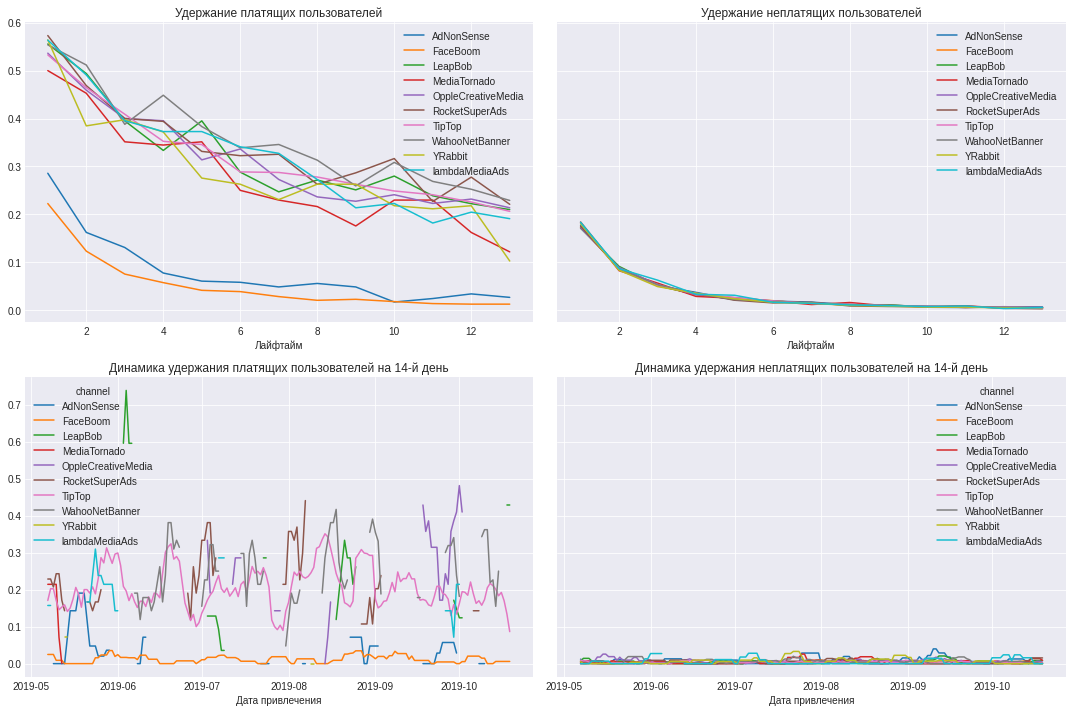

In [67]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- любопытно, что пользователи из FaceBoom и AdNonSense удерживаются хуже пользователей из других источников,
- также привлекает внимание, что пользователи из TipTop не выделяются из общей картины: видимо, раз уж стал платить, то относится к целевой аудитории.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Тут возникают разные причины плохой окупаемости `Tip Top` и `FaceBoom` 
</div>

[В оглавление](#TOC)

### - посчитаем удержание по устройствам<a class='anchor' id='3_4_4'></a>

In [68]:
dimensions = ['device']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

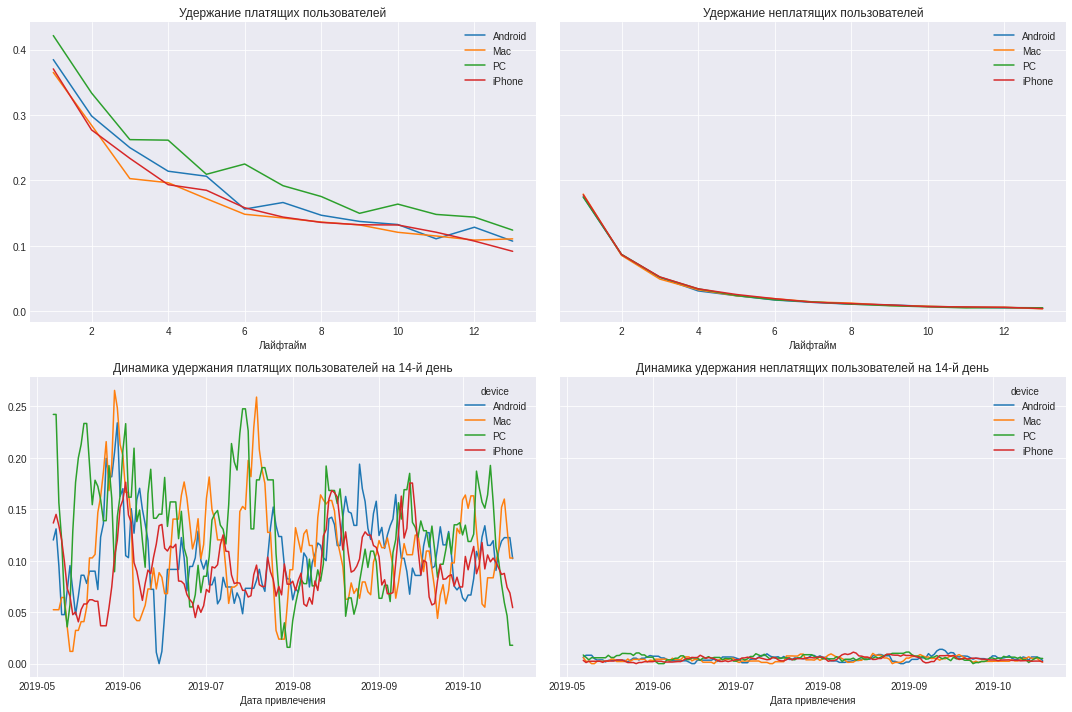

In [69]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- в целом, устройство не влияет на удержание,
- пользователи PC удерживаются чуть лучше, но разрыв несущественный.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>


<div class="alert alert-info"> Есть еще множество существенных отличий в платящей и неплатящей публике, что неоднократно было исследовано:Как минимум, потому что порог выхода для платящих выше - в том числе, в силу эффекта подтверждения издержек. Но плативший и более подвижен в отношении продукта, поведение менее стабильно, зависит от потребительских привычек. Кроме того, раз пользователь заплатил - с некоторой осторжностью можно утверждать, что он заинтересован в приложении, но это не значит, что на всех устройствах опыт взаимодействия одинаково ценный.</div>

[В оглавление](#TOC)

## Выводы по итогам маркетингового анализа<a class="anchor" id="3_conclusion"></a>

Исходя из представленных данных данных можно сделать выводы:


**1. В целом реклама не окупается**
- в течение 14 дней ROI так и не пересекает границу окупаемости,
- необходимо отметить, что изолированно европейский рынок окупается, не окупается только США.

**2. На окупаемость рекламы оказывают негативное влияние несколько факторов**
- размер расходов на рекламу в США не оправдан - приложение получает новых пользователей, однако новые пользователи из США плохо конвертируются в платящих клиентов - отрицательная динамика ROI и, в целом, к концу двухнедельного периода ROI в районе 80%,
- исходя из представленных данных, расходы на FaceBoom (ROI - 0.74) и TipTop (ROI - 0.54) в США - факторы, способствующие убыточности, поскольку львиная доля бюджета - 87 196.90 долларов (82.65%) ушла именно на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%),
- взрывной рост затрат на TipTop от когорты к когорте при том, что начальная стоимость - ниже FaceBoom (расходы на который стабильны),
- также из десяти платных источников привлечения клиентов не окупаются AdNonSense (ROI - 0.83),

**3. Проблемы окупаемости могут быть вызваны следующими обстоятельствами**
- в среднем пользователь проводит в приложении менее двух сессий, средняя продолжительность сессии - 30 минут, медианная - 21 минуту (при том, что почти 37% пользователей проводят в приложении более получаса),
- исходя из представленных данных, принимая во внимание отсутствие подробного описания приложения, затруднительно сделать вывод с разумной степенью достоверности - являются ли сверхдлительные сессии результатом систематической ошибки на каком-то из этапов взаимодействия или это сущностное наполнение приложения влияет на сессии - это требуется уточнять 
-  неэффективная реклама в США - TipTop и FaceBoom рассчитаны  на массовую аудиторию, не готовую в большинстве случаев инвестировать в длительные сессии, независимо от того, являются ли они следствием сущностного наполнения приложения (неподходящая целевая аудитория) или пробемой на уровне взаимодействия (техническая ошибка).


**На основании проведенного анализа можно дать рекомендации**:
- по крайней мере временно отказаться от размещения рекламы в AdNonSense (ROI - 0.83), FaceBoom (ROI - 0.74), TipTop (ROI - 0.54),
- в будущем, при необходимости размещать рекламу в TipTop, по возможности, пересмотреть условия о цены размещения,
- проверить чем вызваны длительные сессии (если это не вызвано самой сущностью приложения),
- проверить обоснованность цены,
- не перераспределять высвободившиеся средства до того, как будет дана оценка причинам длительности сессий и не будет проверена обоснованность цены.


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, пару критических замечаний, с которым ты быстро разберешься). Считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не эффективно. В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе. 
    
    
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Жду отправки проекта 
    
</div>

<div class="alert alert-info"> Скорректировал выводы - исключил заключение о низкой конверсии</div>

[В оглавление](#TOC)